In [2]:
import pickle
import numpy as np
import os

def read_data(filename):
    with open(filename, 'rb') as f:
        x = pickle._Unpickler(f)
        x.encoding = 'latin1'
        data = x.load()
    return data

# List of participant file names
files = [f"{i:02}" for i in range(1, 33)]

labels = []
data = []

base_path = "/kaggle/input/deap-dataset/deap-dataset/data_preprocessed_python/"

for i in files:
    file_path = os.path.join(base_path, f"s{i}.dat")
    d = read_data(file_path)
    labels.append(d['labels'])
    data.append(d['data'])

In [3]:
print(data[0].shape)
print(len(data))
print('----------')
print(labels[0].shape)
print(len(labels))

(40, 40, 8064)
32
----------
(40, 4)
32


In [4]:
#for the channels 
for i in range(len(data)):
    data[i]= data[i][:, :32, :]

In [5]:
print(data[0].shape)
print(len(data))
print('----------')
print(labels[0].shape)
print(len(labels))

(40, 32, 8064)
32
----------
(40, 4)
32


In [6]:
# TODO :Some approaches compute frequency-domain features (FFT, PSD) or time-frequency features  (because the 8000+ is too long)

In [7]:
EEG_ch_names = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1',
                'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz', 'Fp2', 'AF4', 'Fz', 'F4', 'F8',
                'FC6', 'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']

In [8]:
notime_data=[]
import numpy as np

In [9]:
import numpy as np

notime_data = []
notime_labels = []

# for each  participant , we have 32
for p_idx, person in enumerate(data):
    for t_idx, trial in enumerate(person):
        # we collapse time dimension: take mean over timepoints 
        trial_vector = np.mean(trial, axis=1)  # shape: (40,)
        notime_data.append(trial_vector)
        
        # must get the corresponding label for this trial
        notime_labels.append(labels[p_idx][t_idx])  # shape: (4,)

notime_data = np.array(notime_data)       # shape: (32*40, 40) = (1280, 40)
notime_labels = np.array(notime_labels)   # shape: (1280, 4)

print("Data shape:", notime_data.shape)
print("Labels shape:", notime_labels.shape)


Data shape: (1280, 32)
Labels shape: (1280, 4)


In [10]:
import pandas as pd

In [11]:
df_features = pd.DataFrame(notime_data, columns=EEG_ch_names)

# labels
label_names = ['Valence', 'Arousal', 'Dominance', 'Liking']
df_labels = pd.DataFrame(notime_labels, columns=label_names)

# merge features + labels
df = pd.concat([df_features, df_labels], axis=1)

print(df.head())
print("Shape of full DataFrame:", df.shape)

        Fp1       AF3        F3        F7       FC5       FC1        C3  \
0 -0.028259 -0.015335 -0.003302 -0.056503 -0.028488  0.014347 -0.000252   
1 -0.082712 -0.031351 -0.020466 -0.113204 -0.083982 -0.026306 -0.034776   
2  0.060689  0.081124  0.059805  0.023111 -0.008049  0.045063  0.006847   
3 -0.027773 -0.011902  0.017439 -0.027303  0.049521  0.037495  0.014994   
4 -0.062537 -0.072949 -0.071271 -0.051193 -0.028972 -0.053433 -0.040939   

         T7       CP5       CP1  ...       CP6       CP2        P4        P8  \
0 -0.068311 -0.010738  0.040199  ...  0.036044  0.034916  0.024629  0.007397   
1 -0.051734 -0.027296  0.021282  ...  0.016032  0.061128  0.076130  0.068246   
2  0.019250 -0.032186 -0.007827  ... -0.034721 -0.016302 -0.075312 -0.027588   
3  0.003586  0.044774  0.024977  ... -0.066859 -0.021336  0.000258 -0.095102   
4  0.013520  0.015260 -0.038656  ...  0.048018 -0.013598  0.043253  0.064102   

        PO4        O2  Valence  Arousal  Dominance  Liking  
0  0.01

In [12]:
df

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,CP6,CP2,P4,P8,PO4,O2,Valence,Arousal,Dominance,Liking
0,-0.028259,-0.015335,-0.003302,-0.056503,-0.028488,0.014347,-0.000252,-0.068311,-0.010738,0.040199,...,0.036044,0.034916,0.024629,0.007397,0.012641,-0.011155,1.29,1.40,6.90,7.83
1,-0.082712,-0.031351,-0.020466,-0.113204,-0.083982,-0.026306,-0.034776,-0.051734,-0.027296,0.021282,...,0.016032,0.061128,0.076130,0.068246,0.142353,0.156159,0.90,1.69,7.28,8.47
2,0.060689,0.081124,0.059805,0.023111,-0.008049,0.045063,0.006847,0.019250,-0.032186,-0.007827,...,-0.034721,-0.016302,-0.075312,-0.027588,-0.108040,-0.123599,0.42,1.46,9.00,7.08
3,-0.027773,-0.011902,0.017439,-0.027303,0.049521,0.037495,0.014994,0.003586,0.044774,0.024977,...,-0.066859,-0.021336,0.000258,-0.095102,-0.014530,-0.021971,4.94,6.01,6.12,8.06
4,-0.062537,-0.072949,-0.071271,-0.051193,-0.028972,-0.053433,-0.040939,0.013520,0.015260,-0.038656,...,0.048018,-0.013598,0.043253,0.064102,0.062947,0.073402,6.96,3.92,7.19,6.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,-0.015068,-0.439097,-0.002601,-0.342746,0.305603,0.086212,0.312185,-0.432129,0.585818,-0.126779,...,0.908987,0.505454,0.326118,-0.246413,0.849521,0.219849,3.91,6.96,5.82,3.12
1276,-0.074093,-0.608723,0.074181,-0.402769,0.524283,0.201509,0.524640,-0.664969,0.913419,-0.261409,...,1.355936,0.826961,0.426723,-0.433220,1.360671,0.266681,2.81,6.13,6.06,1.04
1277,-0.012218,0.272855,-0.025265,0.163852,-0.209080,-0.064046,-0.162996,0.352787,-0.369132,0.180440,...,-0.702924,-0.375559,-0.208621,0.179822,-0.669554,-0.149759,3.05,7.01,5.10,1.10
1278,0.048134,0.047834,-0.016544,0.084249,0.001667,-0.034263,-0.048989,0.056246,-0.045314,-0.032114,...,-0.052007,-0.024993,-0.026647,0.023883,-0.003679,0.023943,3.99,7.17,4.85,1.00


In [13]:
df.columns

Index(['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'P3',
       'P7', 'PO3', 'O1', 'Oz', 'Pz', 'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6',
       'FC2', 'Cz', 'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2',
       'Valence', 'Arousal', 'Dominance', 'Liking'],
      dtype='object')

In [14]:
df.to_csv("deap_eeg_data.csv")

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

n_features = 32   # EEG channels (we got rid of 8)
n_labels = 4      # Valence, Arousal, Dominance, Liking
latent_dim = 64   # size of random noise vector

# ----------- the Generator -----------
class Generator(nn.Module):
    def __init__(self, latent_dim, n_labels, n_features):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim + n_labels, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, n_features),   # output EEG signal
        )
        
    def forward(self, z, labels):  #we take z ==random noise
        x = torch.cat([z, labels], dim=1)  # concat noise + labels
        return self.model(x)
#here since we have one single value for each channel we dont have any sequential or complex data 

# ----------- Discriminator -----------
class Discriminator(nn.Module):
    def __init__(self, n_features, n_labels):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(n_features + n_labels, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x, labels):
        x = torch.cat([x, labels], dim=1)  # we concat EEG + labels
        return self.model(x)
#our models
G = Generator(latent_dim, n_labels, n_features)
D = Discriminator(n_features, n_labels)


criterion = nn.BCELoss()  #fake or real == binary classes
optimizer_G = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))


In [17]:
import numpy as np


X = np.array(notime_data)  
y = np.array(notime_labels)

# we normalize

batch_size = 32
epochs = 200

for epoch in range(epochs):
    for i in range(0, len(X), batch_size):
        real_X = torch.tensor(X, dtype=torch.float32)
        real_y = torch.tensor(y, dtype=torch.float32)
        batch_size_curr = real_X.size(0)

        # our labesls
        valid = torch.ones(batch_size_curr, 1)
        fake = torch.zeros(batch_size_curr, 1)

        # ---- train the generator ----
        optimizer_G.zero_grad()
        z = torch.randn(batch_size_curr, latent_dim)  # noise
        gen_X = G(z, real_y)  
        validity = D(gen_X, real_y)
        g_loss = criterion(validity, valid)
        g_loss.backward()
        optimizer_G.step()

        # ---- train the discriminator ----
        optimizer_D.zero_grad()
        real_pred = D(real_X, real_y)
        fake_pred = D(gen_X.detach(), real_y)
        real_loss = criterion(real_pred, valid)
        fake_loss = criterion(fake_pred, fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"Epoch [{epoch+1}/{epochs}]  D_loss: {d_loss.item():.4f}  G_loss: {g_loss.item():.4f}")


Epoch [1/200]  D_loss: 0.6809  G_loss: 0.7043
Epoch [2/200]  D_loss: 0.7015  G_loss: 0.6879
Epoch [3/200]  D_loss: 0.6867  G_loss: 0.7096
Epoch [4/200]  D_loss: 0.6904  G_loss: 0.6996
Epoch [5/200]  D_loss: 0.6799  G_loss: 0.6934
Epoch [6/200]  D_loss: 0.6926  G_loss: 0.7088
Epoch [7/200]  D_loss: 0.6787  G_loss: 0.7160
Epoch [8/200]  D_loss: 0.6790  G_loss: 0.7168
Epoch [9/200]  D_loss: 0.6971  G_loss: 0.6806
Epoch [10/200]  D_loss: 0.6841  G_loss: 0.7151
Epoch [11/200]  D_loss: 0.6906  G_loss: 0.6913
Epoch [12/200]  D_loss: 0.6791  G_loss: 0.7214
Epoch [13/200]  D_loss: 0.6812  G_loss: 0.7051
Epoch [14/200]  D_loss: 0.6803  G_loss: 0.7038
Epoch [15/200]  D_loss: 0.6877  G_loss: 0.6977
Epoch [16/200]  D_loss: 0.6847  G_loss: 0.7346
Epoch [17/200]  D_loss: 0.6781  G_loss: 0.6933
Epoch [18/200]  D_loss: 0.6941  G_loss: 0.7157
Epoch [19/200]  D_loss: 0.6861  G_loss: 0.6982
Epoch [20/200]  D_loss: 0.6825  G_loss: 0.7250
Epoch [21/200]  D_loss: 0.6802  G_loss: 0.7088
Epoch [22/200]  D_loss

Generating synthetic samples...
Computing basic statistics...
Computing EEG-specific metrics...

EEG GAN EVALUATION REPORT

BASIC STATISTICAL METRICS:
------------------------------
MSE: 0.032959
MAE: 0.149198
Mean_Error: 0.149198
Std_Error: 0.294761
Skew_Error: 2.562903
Kurtosis_Error: 35.663483
KS_Statistic: 0.328475
Wasserstein_Distance: 0.230572

EEG-SPECIFIC METRICS:
------------------------------
delta_power_error: 0.000046
theta_power_error: 0.000516
alpha_power_error: 0.000632
beta_power_error: 0.001298
gamma_power_error: 0.002712
connectivity_error: 0.574007

Generating plots...
Plots saved as PNG files.


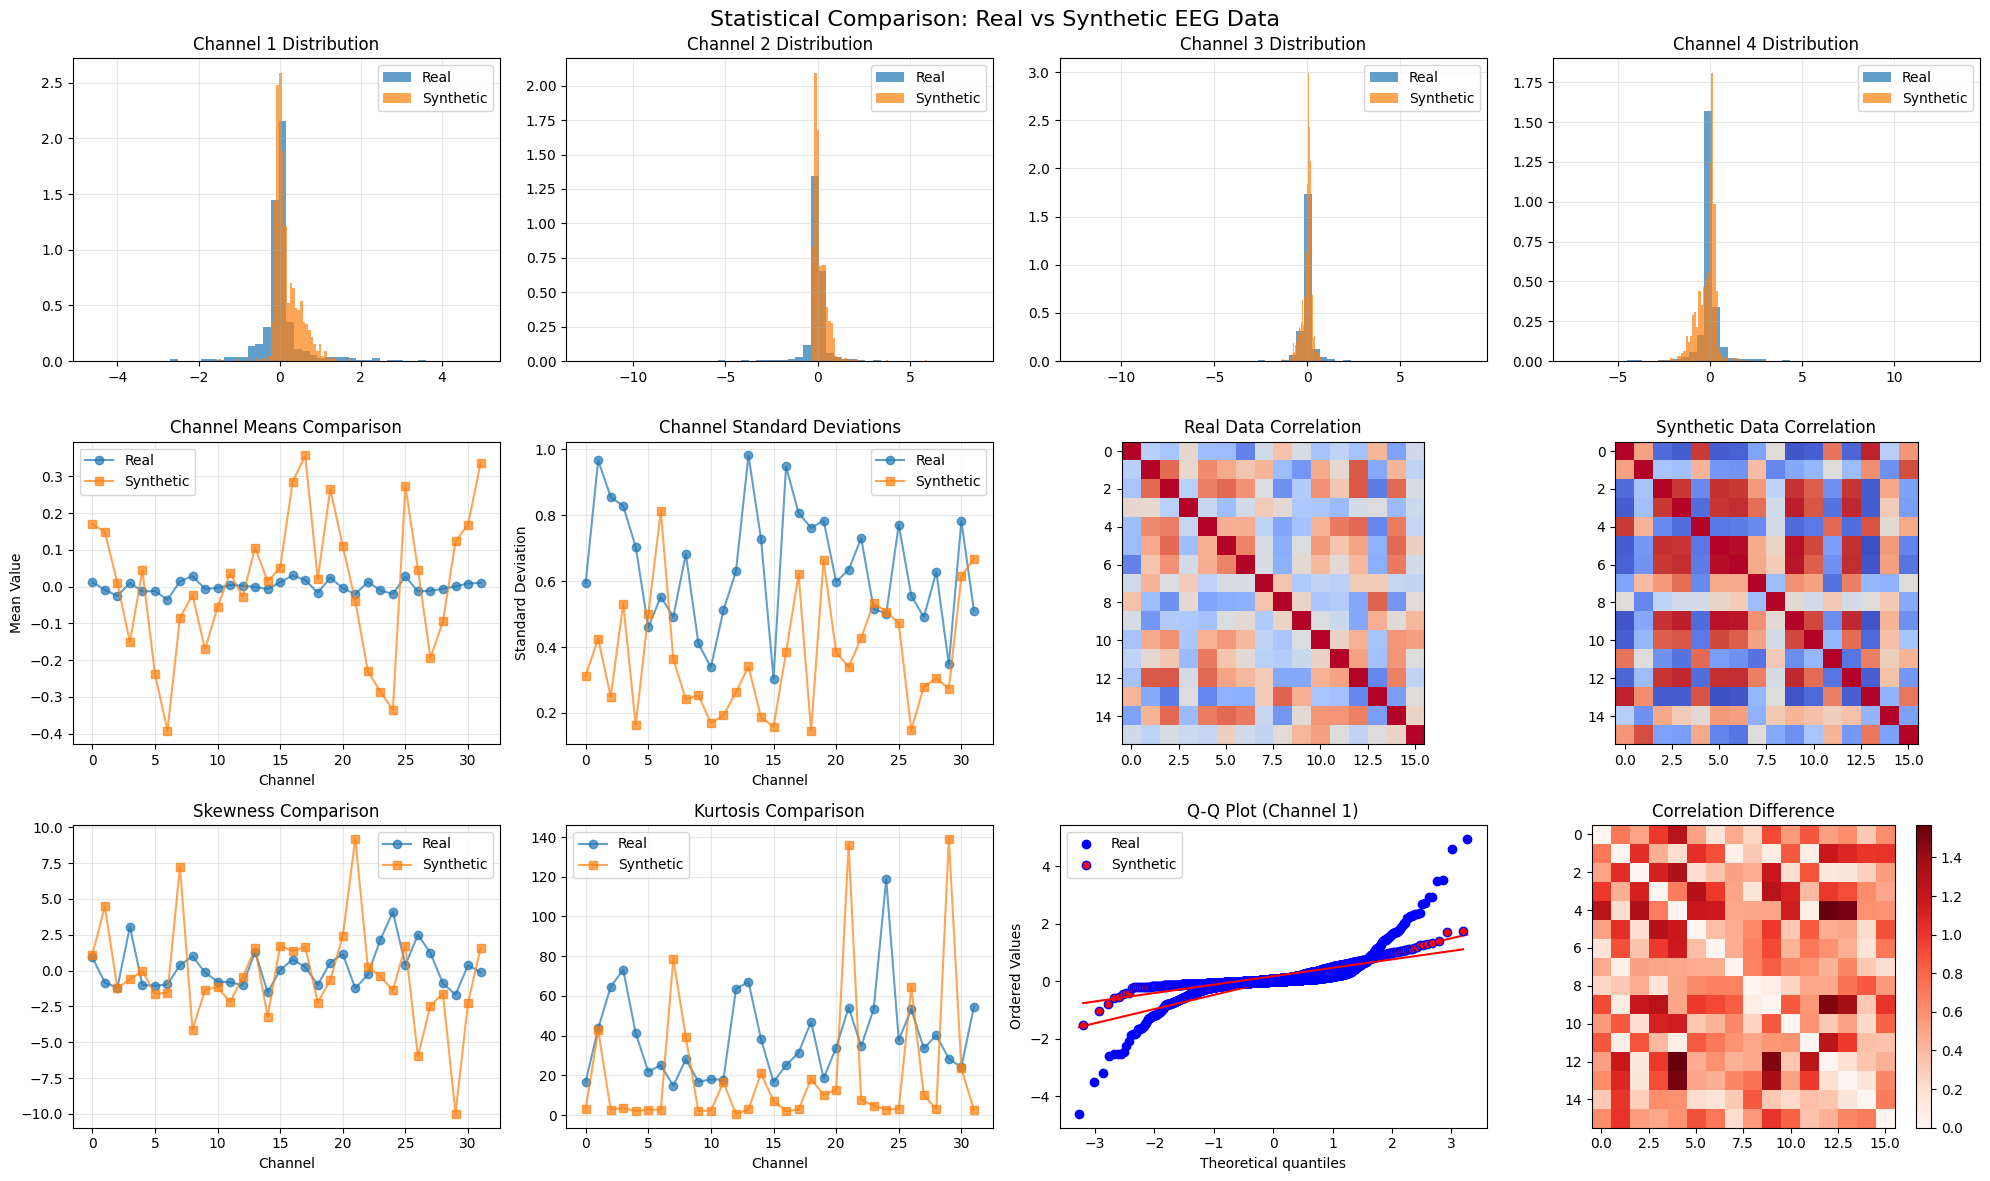

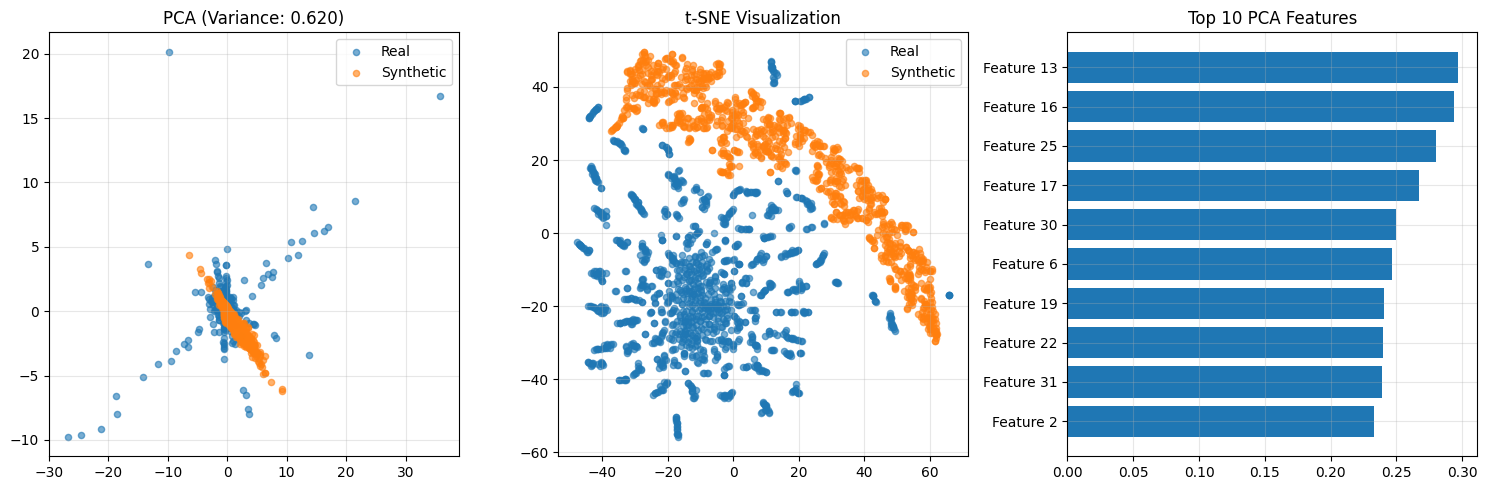

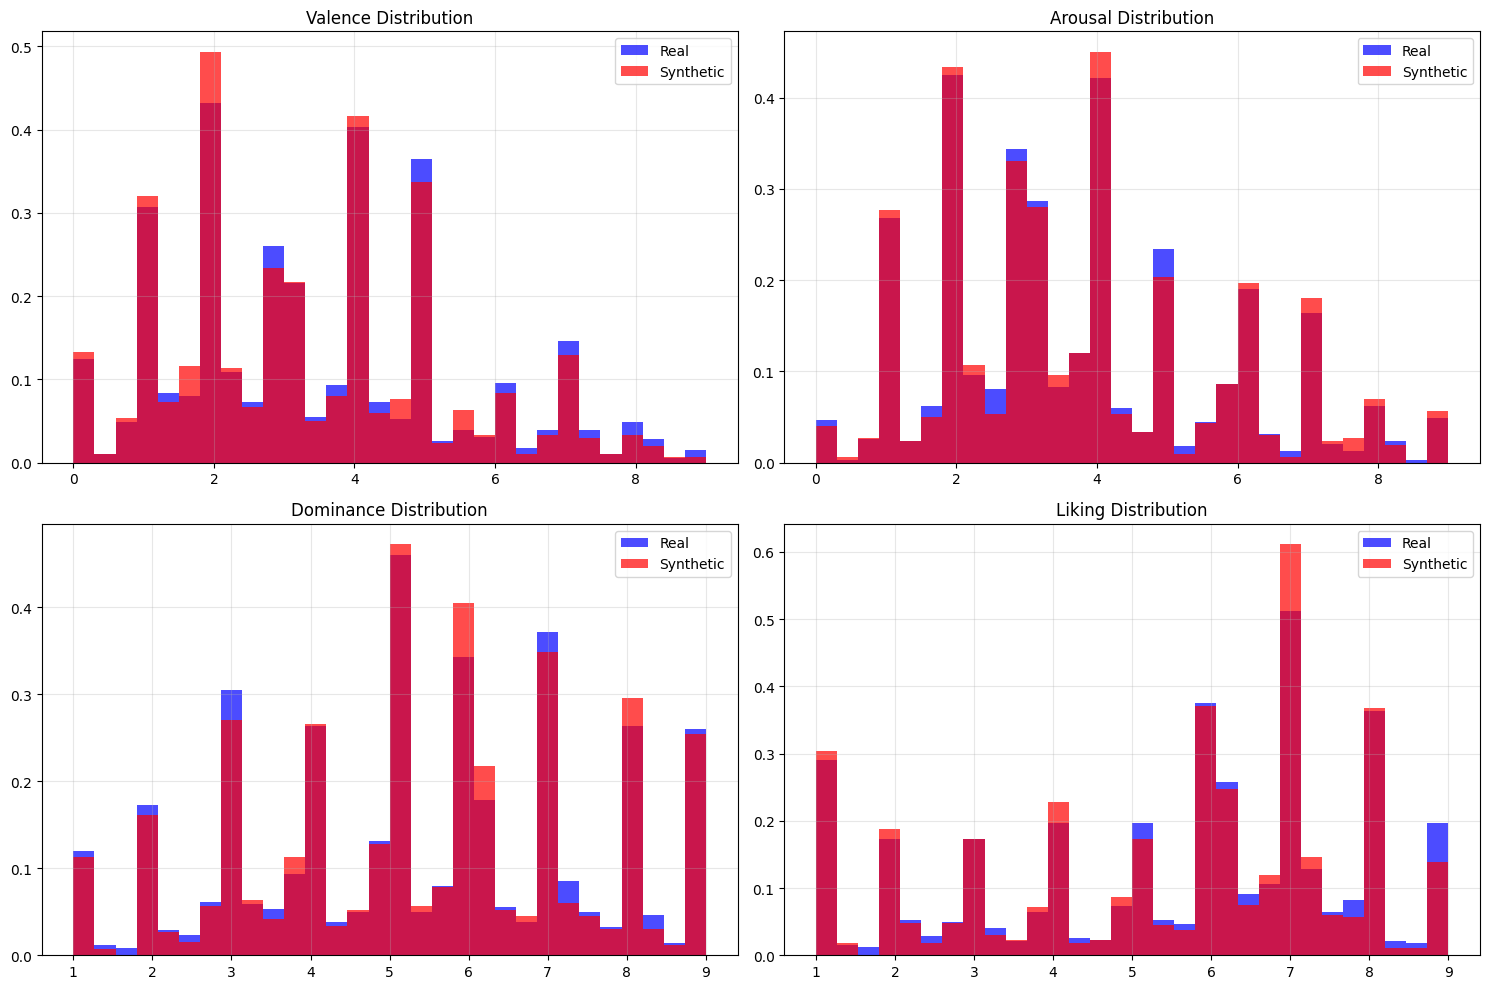

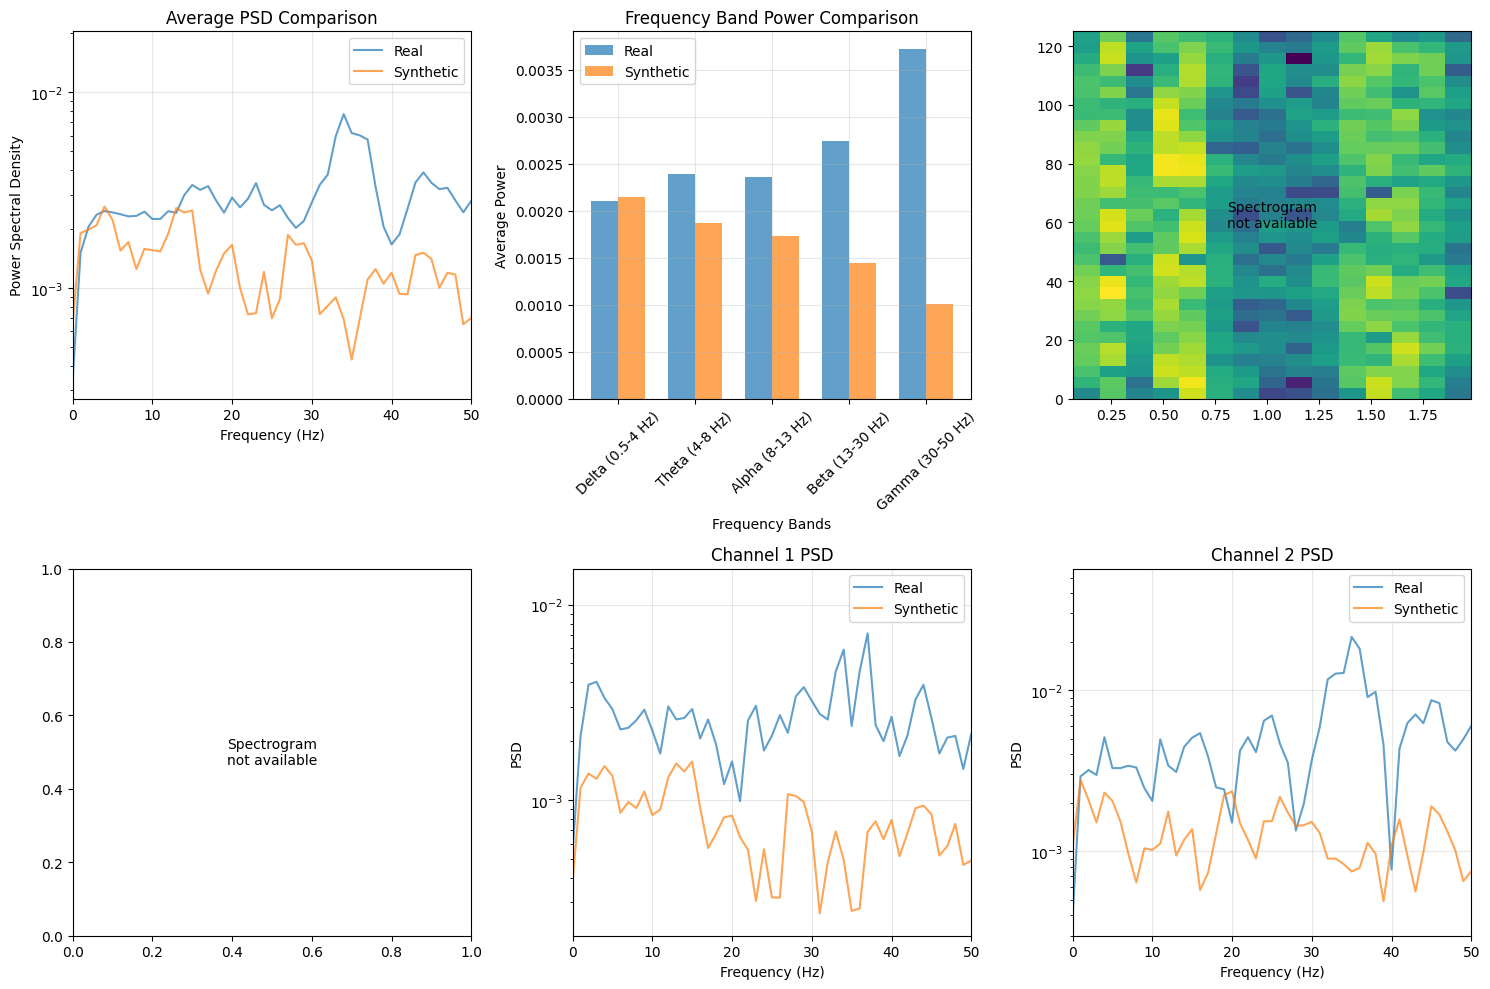

In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kstest, wasserstein_distance
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.signal import welch, coherence
import warnings
warnings.filterwarnings('ignore')

class EEGGANEvaluator:
    def __init__(self, generator, real_data, real_labels, device=None):
       
        # Auto-detect device if not specified
        if device is None:
            self.device = next(generator.parameters()).device
        else:
            self.device = torch.device(device)
        
        # Move generator to the specified device
        self.generator = generator.to(self.device)
        self.generator.eval()
        
        # Convert data to numpy for analysis
        self.real_data = real_data.cpu().numpy()
        self.real_labels = real_labels.cpu().numpy()
        
    def generate_samples(self, n_samples, latent_dim=64):
        """Generate synthetic samples using the trained generator"""
        with torch.no_grad():
            # Sample random indices for labels
            idx = np.random.randint(0, len(self.real_labels), n_samples)
            sample_labels = torch.tensor(self.real_labels[idx], dtype=torch.float32).to(self.device)
            
            # Generate noise
            z = torch.randn(n_samples, latent_dim).to(self.device)
            
            # Generate synthetic data
            synthetic_data = self.generator(z, sample_labels).cpu().numpy()
            
        return synthetic_data, sample_labels.cpu().numpy()
    
    def compute_basic_statistics(self, synthetic_data):
        """Compute basic statistical metrics"""
        metrics = {}
        
        # MSE and MAE
        metrics['MSE'] = mean_squared_error(self.real_data.mean(axis=0), synthetic_data.mean(axis=0))
        metrics['MAE'] = mean_absolute_error(self.real_data.mean(axis=0), synthetic_data.mean(axis=0))
        
        # Statistical moments
        real_mean = np.mean(self.real_data, axis=0)
        synthetic_mean = np.mean(synthetic_data, axis=0)
        real_std = np.std(self.real_data, axis=0)
        synthetic_std = np.std(synthetic_data, axis=0)
        real_skew = stats.skew(self.real_data, axis=0)
        synthetic_skew = stats.skew(synthetic_data, axis=0)
        real_kurtosis = stats.kurtosis(self.real_data, axis=0)
        synthetic_kurtosis = stats.kurtosis(synthetic_data, axis=0)
        
        metrics['Mean_Error'] = np.mean(np.abs(real_mean - synthetic_mean))
        metrics['Std_Error'] = np.mean(np.abs(real_std - synthetic_std))
        metrics['Skew_Error'] = np.mean(np.abs(real_skew - synthetic_skew))
        metrics['Kurtosis_Error'] = np.mean(np.abs(real_kurtosis - synthetic_kurtosis))
        
        # Kolmogorov-Smirnov test
        ks_stats = []
        for i in range(self.real_data.shape[1]):
            ks_stat, _ = kstest(synthetic_data[:, i], lambda x: stats.norm.cdf(x, 
                                                                            loc=real_mean[i], 
                                                                            scale=real_std[i]))
            ks_stats.append(ks_stat)
        metrics['KS_Statistic'] = np.mean(ks_stats)
        
        # Wasserstein distance
        wasserstein_dists = []
        for i in range(self.real_data.shape[1]):
            wd = wasserstein_distance(self.real_data[:, i], synthetic_data[:, i])
            wasserstein_dists.append(wd)
        metrics['Wasserstein_Distance'] = np.mean(wasserstein_dists)
        
        return metrics
    
    def plot_statistical_comparison(self, synthetic_data, figsize=(20, 12)):
        """Create comprehensive statistical comparison plots"""
        fig, axes = plt.subplots(3, 4, figsize=figsize)
        fig.suptitle('Statistical Comparison: Real vs Synthetic EEG Data', fontsize=16)
        
        # 1. Distribution comparison for first few channels
        for i in range(4):
            axes[0, i].hist(self.real_data[:, i], bins=50, alpha=0.7, label='Real', density=True)
            axes[0, i].hist(synthetic_data[:, i], bins=50, alpha=0.7, label='Synthetic', density=True)
            axes[0, i].set_title(f'Channel {i+1} Distribution')
            axes[0, i].legend()
            axes[0, i].grid(True, alpha=0.3)
        
        # 2. Mean comparison
        channels = range(min(32, self.real_data.shape[1]))
        real_means = np.mean(self.real_data[:, channels], axis=0)
        synthetic_means = np.mean(synthetic_data[:, channels], axis=0)
        
        axes[1, 0].plot(channels, real_means, 'o-', label='Real', alpha=0.7)
        axes[1, 0].plot(channels, synthetic_means, 's-', label='Synthetic', alpha=0.7)
        axes[1, 0].set_title('Channel Means Comparison')
        axes[1, 0].set_xlabel('Channel')
        axes[1, 0].set_ylabel('Mean Value')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # 3. Standard deviation comparison
        real_stds = np.std(self.real_data[:, channels], axis=0)
        synthetic_stds = np.std(synthetic_data[:, channels], axis=0)
        
        axes[1, 1].plot(channels, real_stds, 'o-', label='Real', alpha=0.7)
        axes[1, 1].plot(channels, synthetic_stds, 's-', label='Synthetic', alpha=0.7)
        axes[1, 1].set_title('Channel Standard Deviations')
        axes[1, 1].set_xlabel('Channel')
        axes[1, 1].set_ylabel('Standard Deviation')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        # 4. Correlation matrix comparison
        real_corr = np.corrcoef(self.real_data[:, :16].T)
        synthetic_corr = np.corrcoef(synthetic_data[:, :16].T)
        
        im1 = axes[1, 2].imshow(real_corr, cmap='coolwarm', vmin=-1, vmax=1)
        axes[1, 2].set_title('Real Data Correlation')
        
        im2 = axes[1, 3].imshow(synthetic_corr, cmap='coolwarm', vmin=-1, vmax=1)
        axes[1, 3].set_title('Synthetic Data Correlation')
        
        # 5. Skewness and Kurtosis
        real_skew = stats.skew(self.real_data[:, channels], axis=0)
        synthetic_skew = stats.skew(synthetic_data[:, channels], axis=0)
        
        axes[2, 0].plot(channels, real_skew, 'o-', label='Real', alpha=0.7)
        axes[2, 0].plot(channels, synthetic_skew, 's-', label='Synthetic', alpha=0.7)
        axes[2, 0].set_title('Skewness Comparison')
        axes[2, 0].set_xlabel('Channel')
        axes[2, 0].legend()
        axes[2, 0].grid(True, alpha=0.3)
        
        real_kurt = stats.kurtosis(self.real_data[:, channels], axis=0)
        synthetic_kurt = stats.kurtosis(synthetic_data[:, channels], axis=0)
        
        axes[2, 1].plot(channels, real_kurt, 'o-', label='Real', alpha=0.7)
        axes[2, 1].plot(channels, synthetic_kurt, 's-', label='Synthetic', alpha=0.7)
        axes[2, 1].set_title('Kurtosis Comparison')
        axes[2, 1].set_xlabel('Channel')
        axes[2, 1].legend()
        axes[2, 1].grid(True, alpha=0.3)
        
        # 6. Q-Q plot for first channel
        stats.probplot(self.real_data[:, 0], dist="norm", plot=axes[2, 2])
        axes[2, 2].get_lines()[0].set_markerfacecolor('blue')
        axes[2, 2].get_lines()[0].set_label('Real')
        
        stats.probplot(synthetic_data[:, 0], dist="norm", plot=axes[2, 2])
        axes[2, 2].get_lines()[2].set_markerfacecolor('red')
        axes[2, 2].get_lines()[2].set_label('Synthetic')
        axes[2, 2].set_title('Q-Q Plot (Channel 1)')
        axes[2, 2].legend()
        
        # 7. Correlation difference heatmap
        corr_diff = np.abs(real_corr - synthetic_corr)
        im3 = axes[2, 3].imshow(corr_diff, cmap='Reds')
        axes[2, 3].set_title('Correlation Difference')
        plt.colorbar(im3, ax=axes[2, 3])
        
        plt.tight_layout()
        return fig
    
    def plot_dimensionality_reduction(self, synthetic_data, figsize=(15, 5)):
        """Plot PCA and t-SNE visualizations"""
        fig, axes = plt.subplots(1, 3, figsize=figsize)
        
        # Combine data for visualization
        combined_data = np.vstack([self.real_data, synthetic_data])
        labels = ['Real'] * len(self.real_data) + ['Synthetic'] * len(synthetic_data)
        
        # PCA
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(combined_data)
        
        real_pca = pca_result[:len(self.real_data)]
        synthetic_pca = pca_result[len(self.real_data):]
        
        axes[0].scatter(real_pca[:, 0], real_pca[:, 1], alpha=0.6, label='Real', s=20)
        axes[0].scatter(synthetic_pca[:, 0], synthetic_pca[:, 1], alpha=0.6, label='Synthetic', s=20)
        axes[0].set_title(f'PCA (Variance: {pca.explained_variance_ratio_.sum():.3f})')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # t-SNE
        tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(combined_data)//4))
        tsne_result = tsne.fit_transform(combined_data)
        
        real_tsne = tsne_result[:len(self.real_data)]
        synthetic_tsne = tsne_result[len(self.real_data):]
        
        axes[1].scatter(real_tsne[:, 0], real_tsne[:, 1], alpha=0.6, label='Real', s=20)
        axes[1].scatter(synthetic_tsne[:, 0], synthetic_tsne[:, 1], alpha=0.6, label='Synthetic', s=20)
        axes[1].set_title('t-SNE Visualization')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        # Feature importance from PCA
        feature_importance = np.abs(pca.components_[0])
        top_features = np.argsort(feature_importance)[-10:]
        
        axes[2].barh(range(10), feature_importance[top_features])
        axes[2].set_yticks(range(10))
        axes[2].set_yticklabels([f'Feature {i}' for i in top_features])
        axes[2].set_title('Top 10 PCA Features')
        axes[2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        return fig
    
    def plot_label_distribution(self, synthetic_labels, figsize=(15, 10)):
        """Compare label distributions between real and synthetic data"""
        label_names = ['Valence', 'Arousal', 'Dominance', 'Liking']
        
        fig, axes = plt.subplots(2, 2, figsize=figsize)
        axes = axes.flatten()
        
        for i, label_name in enumerate(label_names):
            # Distribution comparison
            axes[i].hist(self.real_labels[:, i], bins=30, alpha=0.7, 
                        label='Real', density=True, color='blue')
            axes[i].hist(synthetic_labels[:, i], bins=30, alpha=0.7, 
                        label='Synthetic', density=True, color='red')
            axes[i].set_title(f'{label_name} Distribution')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
        
        plt.tight_layout()
        return fig
    
    def compute_eeg_specific_metrics(self, synthetic_data, fs=250):
        """Compute EEG-specific evaluation metrics"""
        metrics = {}
        
        # Power spectral density comparison - use same nperseg for both
        nperseg = min(256, min(len(self.real_data), len(synthetic_data)) // 4)
        real_freqs, real_psd = welch(self.real_data.T, fs=fs, nperseg=nperseg)
        synthetic_freqs, synthetic_psd = welch(synthetic_data.T, fs=fs, nperseg=nperseg)
        
        # Compare PSD in different frequency bands
        bands = {
            'delta': (0.5, 4),
            'theta': (4, 8), 
            'alpha': (8, 13),
            'beta': (13, 30),
            'gamma': (30, 50)
        }
        
        # Ensure we use the minimum frequency range available
        max_freq = min(real_freqs.max(), synthetic_freqs.max())
        
        for band_name, (low, high) in bands.items():
            # Skip bands that exceed available frequency range
            if low >= max_freq:
                continue
                
            high = min(high, max_freq)
            band_mask = (real_freqs >= low) & (real_freqs <= high)
            
            if np.any(band_mask):  # Check if there are any frequencies in this band
                real_band_power = np.mean(real_psd[:, band_mask], axis=1)
                synthetic_band_power = np.mean(synthetic_psd[:, band_mask], axis=1)
                
                metrics[f'{band_name}_power_error'] = np.mean(np.abs(
                    np.mean(real_band_power) - np.mean(synthetic_band_power)
                ))
        
        # Channel connectivity (simplified)
        real_conn = np.corrcoef(self.real_data.T)
        synthetic_conn = np.corrcoef(synthetic_data.T)
        metrics['connectivity_error'] = np.mean(np.abs(real_conn - synthetic_conn))
        
        return metrics
    
    def plot_frequency_analysis(self, synthetic_data, fs=250, figsize=(15, 10)):
        """Plot frequency domain analysis"""
        fig, axes = plt.subplots(2, 3, figsize=figsize)
        
        # Compute PSDs with same parameters
        nperseg = min(256, min(len(self.real_data), len(synthetic_data)) // 4)
        real_freqs, real_psd = welch(self.real_data.T, fs=fs, nperseg=nperseg)
        synthetic_freqs, synthetic_psd = welch(synthetic_data.T, fs=fs, nperseg=nperseg)
        
        # Average PSD across channels
        real_psd_avg = np.mean(real_psd, axis=0)
        synthetic_psd_avg = np.mean(synthetic_psd, axis=0)
        
        # Plot average PSD
        axes[0, 0].semilogy(real_freqs, real_psd_avg, label='Real', alpha=0.7)
        axes[0, 0].semilogy(synthetic_freqs, synthetic_psd_avg, label='Synthetic', alpha=0.7)
        axes[0, 0].set_xlabel('Frequency (Hz)')
        axes[0, 0].set_ylabel('Power Spectral Density')
        axes[0, 0].set_title('Average PSD Comparison')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        max_freq = min(50, min(real_freqs.max(), synthetic_freqs.max()))
        axes[0, 0].set_xlim(0, max_freq)
        
        # Frequency band power comparison
        bands = {
            'Delta (0.5-4 Hz)': (0.5, 4),
            'Theta (4-8 Hz)': (4, 8), 
            'Alpha (8-13 Hz)': (8, 13),
            'Beta (13-30 Hz)': (13, 30),
            'Gamma (30-50 Hz)': (30, 50)
        }
        
        max_available_freq = min(real_freqs.max(), synthetic_freqs.max())
        valid_bands = {}
        real_band_powers = []
        synthetic_band_powers = []
        
        for band_name, (low, high) in bands.items():
            if low < max_available_freq:
                high = min(high, max_available_freq)
                valid_bands[band_name] = (low, high)
                
                band_mask = (real_freqs >= low) & (real_freqs <= high)
                if np.any(band_mask):
                    real_power = np.mean(real_psd[:, band_mask])
                    synthetic_power = np.mean(synthetic_psd[:, band_mask])
                    real_band_powers.append(real_power)
                    synthetic_band_powers.append(synthetic_power)
        
        if valid_bands:
            band_names = list(valid_bands.keys())
            x = np.arange(len(band_names))
            width = 0.35
            
            axes[0, 1].bar(x - width/2, real_band_powers, width, label='Real', alpha=0.7)
            axes[0, 1].bar(x + width/2, synthetic_band_powers, width, label='Synthetic', alpha=0.7)
            axes[0, 1].set_xlabel('Frequency Bands')
            axes[0, 1].set_ylabel('Average Power')
            axes[0, 1].set_title('Frequency Band Power Comparison')
            axes[0, 1].set_xticks(x)
            axes[0, 1].set_xticklabels(band_names, rotation=45)
            axes[0, 1].legend()
            axes[0, 1].grid(True, alpha=0.3)
        else:
            axes[0, 1].text(0.5, 0.5, 'No valid frequency bands\nfor analysis', 
                           transform=axes[0, 1].transAxes, ha='center', va='center')
            axes[0, 1].set_title('Frequency Band Power Comparison')
        
        # Spectrogram comparison for first channel (simplified)
        try:
            sample_len = min(512, len(self.real_data), len(synthetic_data))
            
            f_real, t_real, Sxx_real = axes[0, 2].specgram(
                self.real_data[:sample_len, 0], Fs=fs, NFFT=64, noverlap=32
            )
            axes[0, 2].set_title('Real Data Spectrogram (Ch 1)')
            axes[0, 2].set_xlabel('Time')
            axes[0, 2].set_ylabel('Frequency (Hz)')
            
            f_syn, t_syn, Sxx_syn = axes[1, 0].specgram(
                synthetic_data[:sample_len, 0], Fs=fs, NFFT=64, noverlap=32
            )
            axes[1, 0].set_title('Synthetic Data Spectrogram (Ch 1)')
            axes[1, 0].set_xlabel('Time')
            axes[1, 0].set_ylabel('Frequency (Hz)')
        except:
            axes[0, 2].text(0.5, 0.5, 'Spectrogram\nnot available', 
                           transform=axes[0, 2].transAxes, ha='center', va='center')
            axes[1, 0].text(0.5, 0.5, 'Spectrogram\nnot available', 
                           transform=axes[1, 0].transAxes, ha='center', va='center')
        
        # Channel-wise PSD comparison for a few channels
        n_channels = min(3, self.real_data.shape[1], synthetic_data.shape[1])
        for i in range(min(2, n_channels)):
            axes[1, i+1].semilogy(real_freqs, real_psd[i], label='Real', alpha=0.7)
            axes[1, i+1].semilogy(synthetic_freqs, synthetic_psd[i], label='Synthetic', alpha=0.7)
            axes[1, i+1].set_xlabel('Frequency (Hz)')
            axes[1, i+1].set_ylabel('PSD')
            axes[1, i+1].set_title(f'Channel {i+1} PSD')
            axes[1, i+1].legend()
            axes[1, i+1].grid(True, alpha=0.3)
            axes[1, i+1].set_xlim(0, max_freq)
        
        plt.tight_layout()
        return fig
    
    def generate_evaluation_report(self, n_samples=1000, save_plots=True):
        """Generate a comprehensive evaluation report"""
        print("Generating synthetic samples...")
        synthetic_data, synthetic_labels = self.generate_samples(n_samples)
        
        print("Computing basic statistics...")
        basic_metrics = self.compute_basic_statistics(synthetic_data)
        
        print("Computing EEG-specific metrics...")
        eeg_metrics = self.compute_eeg_specific_metrics(synthetic_data)
        
        # Combine all metrics
        all_metrics = {**basic_metrics, **eeg_metrics}
        
        print("\n" + "="*50)
        print("EEG GAN EVALUATION REPORT")
        print("="*50)
        
        print("\nBASIC STATISTICAL METRICS:")
        print("-" * 30)
        for metric, value in basic_metrics.items():
            print(f"{metric}: {value:.6f}")
        
        print("\nEEG-SPECIFIC METRICS:")
        print("-" * 30)
        for metric, value in eeg_metrics.items():
            print(f"{metric}: {value:.6f}")
        
        # Generate plots
        print("\nGenerating plots...")
        fig1 = self.plot_statistical_comparison(synthetic_data)
        fig2 = self.plot_dimensionality_reduction(synthetic_data)
        fig3 = self.plot_label_distribution(synthetic_labels)
        fig4 = self.plot_frequency_analysis(synthetic_data)
        
        if save_plots:
            fig1.savefig('eeg_statistical_comparison.png', dpi=300, bbox_inches='tight')
            fig2.savefig('eeg_dimensionality_reduction.png', dpi=300, bbox_inches='tight')
            fig3.savefig('eeg_label_distribution.png', dpi=300, bbox_inches='tight')
            fig4.savefig('eeg_frequency_analysis.png', dpi=300, bbox_inches='tight')
            print("Plots saved as PNG files.")
        
        plt.show()
        
        return all_metrics, synthetic_data, synthetic_labels


# After training your GAN, use the evaluator like this:



# Option 2: Specify device explicitly
evaluator = EEGGANEvaluator(
    generator=G,
    real_data=torch.tensor(X, dtype=torch.float32),
    real_labels=torch.tensor(y, dtype=torch.float32),
    device='cuda:0'  # or 'cpu'
)

# Generate comprehensive evaluation
metrics, synthetic_data, synthetic_labels = evaluator.generate_evaluation_report(
    n_samples=1000, 
    save_plots=True
)


# Appraoch 2

In [21]:
data2=[]
labels2=[]

In [22]:
def getbatches(biglist):
    n = 10  # number of parts
    chunk_size = len(biglist) // n
    remainder = len(biglist) % n
    
    result = []
    start = 0
    
    for i in range(n):
        end = start + chunk_size + (1 if i < remainder else 0)  
        result.append(biglist[start:end])
        start = end
    return result

In [23]:
import numpy as np
from scipy.stats import skew, kurtosis
def get_stat_data(batches):
    features = []
    for batch in batches:  # batch is a list of values
        batch = np.array(batch)
        batch_features = [
            np.mean(batch),
            np.std(batch),
            np.min(batch),
            np.max(batch),
            np.max(batch) - np.min(batch),  # range
            np.median(batch),
            skew(batch),
            kurtosis(batch),
            np.var(batch)
        ]
        features.extend(batch_features)
    return np.array(features)

In [24]:
data2 = []
labels2=[]

In [25]:
labels_data=d['labels'][0]
print(labels_data)


[8.13 4.83 9.   4.87]


In [26]:
for person in files:
    file_path = os.path.join(base_path, f"s{person}.dat")
    print(file_path)
    d = read_data(file_path)
    for records in range(30):
    
                # first person of each file (the second 0)
            trial_data = d['data'][records][:32, :] # shape (32, 8064)
            trial_labels = d['labels'][records] 
            
            person_features = []  # store the 32x90 features
            
            for feature in range(32):
                batches = getbatches(trial_data[feature])
                features = get_stat_data(batches)  # length 90
                person_features.append(features)
            
            person_features = np.array(person_features)  # shape (32, 90)
            #print(person_features.shape)
            data2.append(person_features)
            labels2.append(trial_labels)

data2 = np.array(data2)  # shape: (1280, 32, 90) - all trials from all participants
labels2 = np.array(labels2)
print(data2.shape)

/kaggle/input/deap-dataset/deap-dataset/data_preprocessed_python/s01.dat
/kaggle/input/deap-dataset/deap-dataset/data_preprocessed_python/s02.dat
/kaggle/input/deap-dataset/deap-dataset/data_preprocessed_python/s03.dat
/kaggle/input/deap-dataset/deap-dataset/data_preprocessed_python/s04.dat
/kaggle/input/deap-dataset/deap-dataset/data_preprocessed_python/s05.dat
/kaggle/input/deap-dataset/deap-dataset/data_preprocessed_python/s06.dat
/kaggle/input/deap-dataset/deap-dataset/data_preprocessed_python/s07.dat
/kaggle/input/deap-dataset/deap-dataset/data_preprocessed_python/s08.dat
/kaggle/input/deap-dataset/deap-dataset/data_preprocessed_python/s09.dat
/kaggle/input/deap-dataset/deap-dataset/data_preprocessed_python/s10.dat
/kaggle/input/deap-dataset/deap-dataset/data_preprocessed_python/s11.dat
/kaggle/input/deap-dataset/deap-dataset/data_preprocessed_python/s12.dat
/kaggle/input/deap-dataset/deap-dataset/data_preprocessed_python/s13.dat
/kaggle/input/deap-dataset/deap-dataset/data_prepro

In [53]:
import pandas as pd
import numpy as np

# Flatten EEG features: (1280, 32, 90) -> (1280, 2880)
num_samples = data2.shape[0]
data2_flat = data2.reshape(num_samples, -1)

# Create EEG feature column names
columns = [f'ch{ch+1}_f{f+1}' for ch in range(32) for f in range(90)]

# Create DataFrames
df_eeg = pd.DataFrame(data2_flat, columns=columns)
df_labels = pd.DataFrame(labels2, columns=['valence', 'arousal', 'dominance', 'liking'])

# Merge labels + features
df_full = pd.concat([df_labels, df_eeg], axis=1)

# Save to CSV
csv_filename = "real_eeg_features_with_labels.csv"
df_full.to_csv(csv_filename, index=False)

print(f"✅ Saved real EEG features with labels to {csv_filename}")


✅ Saved real EEG features with labels to real_eeg_features_with_labels.csv


In [28]:
print(len(labels2)) 
X=data2
y=labels2

960


In [29]:
import pandas as pd

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Option 1: Flatten approach (most straightforward)
def create_flattened_model():
    """Treat all channel features as independent input features"""
    model = models.Sequential([
        layers.Input(shape=(32, 90)),
        layers.Flatten(),  # Convert (32, 90) -> (2880,)
        
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        
        layers.Dense(64, activation='relu'),
        layers.Dense(4, activation='linear')  # 4 emotion outputs
    ])
    return model
def create_channel_aware_model():
    """Process each channel separately, then combine"""
    
    # Input layer
    input_layer = layers.Input(shape=(32, 90))
    
    # Apply same processing to each channel
    channel_outputs = []
    for i in range(32):
        # Extract features for channel i
        channel_i = layers.Lambda(lambda x, idx=i: x[:, idx, :])(input_layer)
        
        # Process this channel's features
        processed = layers.Dense(64, activation='relu')(channel_i)
        processed = layers.BatchNormalization()(processed)
        processed = layers.Dropout(0.3)(processed)
        processed = layers.Dense(32, activation='relu')(processed)
        
        channel_outputs.append(processed)
    
    # Combine all channels
    combined = layers.Concatenate()(channel_outputs)  # Shape: (32*32,) = (1024,)
    
    # Final prediction layers
    x = layers.Dense(256, activation='relu')(combined)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    output = layers.Dense(4, activation='linear')(x)
    
    model = models.Model(inputs=input_layer, outputs=output)
    return model
def create_improved_conv1d_model():
    """Improved version of your Conv1D approach"""
    model = models.Sequential([
        layers.Input(shape=(32, 90)),
        
        # Treat 90 features as the "sequence" dimension instead
        layers.Permute((2, 1)),  # Change to (90, 32) - 90 time steps, 32 features
        
        layers.Conv1D(64, kernel_size=5, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.GlobalAveragePooling1D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(64, activation='relu'),
        layers.Dense(4, activation='linear')
    ])
    return model
def preprocess_statistical_features(X, y):
    """Proper preprocessing for statistical features"""
    # Flatten for standardization
    X_flat = X.reshape(-1, 32 * 90)
    
    # Standardize features
    scaler = StandardScaler()
    X_flat_scaled = scaler.fit_transform(X_flat)
    
    # Reshape back
    X_scaled = X_flat_scaled.reshape(-1, 32, 90)
    
    # Keep labels in original scale or normalize appropriately
    y_processed = y.copy()  # Keep 1-9 scale
    
    return X_scaled.astype(np.float32), y_processed.astype(np.float32), scaler

2025-09-19 16:19:16.953113: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758298757.144020      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758298757.198172      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [31]:
X_processed, y_processed, scaler = preprocess_statistical_features(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42
)

print(f"Data shapes: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Label ranges: {y_processed.min():.2f} to {y_processed.max():.2f}")

# Try the flattened approach first (usually works best for statistical features)
model = create_flattened_model()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mae',  # Mean Absolute Error - more interpretable for your data
    metrics=['mae', 'mse']
)

model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.7)
    ],
    verbose=1
)

# Evaluate
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test, verbose=0)
predictions = model.predict(X_test, verbose=0)

print(f"\nTest MAE: {test_mae:.3f} (on 1-9 scale)")
print(f"Test MSE: {test_mse:.3f}")

# Per-emotion evaluation
emotion_names = ['Valence', 'Arousal', 'Dominance', 'Liking']
print("\nPer-emotion MAE:")
for i, emotion in enumerate(emotion_names):
    mae = np.mean(np.abs(y_test[:, i] - predictions[:, i]))
    corr = np.corrcoef(y_test[:, i], predictions[:, i])[0, 1]
    print(f"{emotion}: MAE={mae:.3f}, Correlation={corr:.3f}")

Data shapes: X_train (768, 32, 90), y_train (768, 4)
Label ranges: 0.00 to 9.00


I0000 00:00:1758298769.049274      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15449 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2880)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,475,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,650,884 (6.30 MB)

 Trainable params: 1,649,348 (6.29 MB)

 Non-trainable params: 1,536 (6.00 KB)

Epoch 1/50


I0000 00:00:1758298773.864834     110 service.cc:148] XLA service 0x7a14a80024e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758298773.865388     110 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1758298774.264178     110 cuda_dnn.cc:529] Loaded cuDNN version 90300


16/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2658 - mae: 4.2658 - mse: 25.3580 

I0000 00:00:1758298776.578944     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 3.9148 - mae: 3.9148 - mse: 22.2372 - val_loss: 3.3041 - val_mae: 3.3041 - val_mse: 23.3334 - learning_rate: 0.0010
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8948 - mae: 1.8948 - mse: 5.6598 - val_loss: 2.0731 - val_mae: 2.0731 - val_mse: 7.2724 - learning_rate: 0.0010
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6865 - mae: 1.6865 - mse: 4.4729 - val_loss: 1.8608 - val_mae: 1.8608 - val_mse: 5.3046 - learning_rate: 0.0010
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6125 - mae: 1.6125 - mse: 4.0906 - val_loss: 1.9105 - val_mae: 1.9105 - val_mse: 5.4411 - learning_rate: 0.0010
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5637 - mae: 1.5637 - mse: 3.9553 - val_loss: 1.7862 - val_mae: 1.7862 - val_mse: 4.7744 - learning_rate: 0.0010
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5722 - mae: 1.5722 - mse: 3.9620 - val_loss: 1.7244 - val_mae: 1.7244 - val_mse: 4.5937 

In [32]:
import numpy as np

# Save both X and y in one file
np.savez("eeg_dataset.npz", X=X, y=y)

# Later, load them


In [33]:
data = np.load("eeg_dataset.npz")
X_loaded = data['X']
y_loaded = data['y']

In [34]:
print(X_loaded.shape)

(960, 32, 90)


In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Flatten X from (64, 32, 90) → (64, 2880)
X_flat = X.reshape(X.shape[0], -1)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Train a simple linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 189.7366926884023


In [37]:
import numpy as np
from sklearn.model_selection import train_test_split

X = X.astype(np.float32)
y = y.astype(np.float32)  # if one-hot; if integer labels, just use int

# Example: 80% train, 20% test


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
model = models.Sequential([
    layers.Input(shape=(32, 90)),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.GlobalAveragePooling1D(),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='linear')  # 4 continuous outputs
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])


In [40]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=8,
    validation_data=(X_test, y_test)
)


Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 36989.6758 - mae: 56.3071 - val_loss: 173.8132 - val_mae: 6.8005
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 153.3808 - mae: 5.8305 - val_loss: 130.5820 - val_mae: 5.7838
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.8654 - mae: 4.7699 - val_loss: 90.5334 - val_mae: 5.4148
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.6001 - mae: 4.4863 - val_loss: 76.0455 - val_mae: 5.2417
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.0177 - mae: 4.2959 - val_loss: 72.8576 - val_mae: 4.9897
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.3471 - mae: 4.1471 - val_loss: 68.2492 - val_mae: 4.5997
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.1938 - mae: 3.8958 - val_loss: 60.9814 - val_mae: 4.3391
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.8996 - mae: 3.6316 - val_loss: 53.2971 - val_mae: 3.6908
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

In [41]:
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)

preds = model.predict(X_test)
pred_labels = np.argmax(preds, axis=1)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 27.0163 - mae: 2.2765 
Test Accuracy: 2.3219473361968994
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


In [42]:
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss (MSE):", loss)
print("Test MAE:", mae)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.0163 - mae: 2.2765
Test Loss (MSE): 29.715951919555664
Test MAE: 2.3219473361968994


# GENERATIVES

## Gan

Enhanced GAN Training - Data shape: X(960, 32, 90), y(960, 4)
Training Enhanced GAN on data: X(960, 32, 90), y(960, 4)
Generator parameters: 8,698,432
Discriminator parameters: 3,643,393
Starting Enhanced GAN Training...
Epoch [0/200] | G Loss: -0.2252 | D Loss: 3.4637
  Wasserstein Distance: 147.3774
  Mean Difference: 29.1119
  Power Spectrum Diff: 0.6522
Epoch [25/200] | G Loss: 6.1389 | D Loss: -7.5342
  Wasserstein Distance: 207.9621
  Mean Difference: 25.6804
  Power Spectrum Diff: 0.3757
Epoch [50/200] | G Loss: -3.9676 | D Loss: -13.8725
  Wasserstein Distance: 128.0797
  Mean Difference: 62.7479
  Power Spectrum Diff: 0.5549
Epoch [75/200] | G Loss: -13.6850 | D Loss: -18.7505
  Wasserstein Distance: 119.9981
  Mean Difference: 4.9247
  Power Spectrum Diff: 0.2799
Epoch [100/200] | G Loss: -15.6886 | D Loss: -20.6359
  Wasserstein Distance: 110.8325
  Mean Difference: 11.0330
  Power Spectrum Diff: 0.0890
Epoch [125/200] | G Loss: -17.2516 | D Loss: -21.1939
  Wasserstein Dist

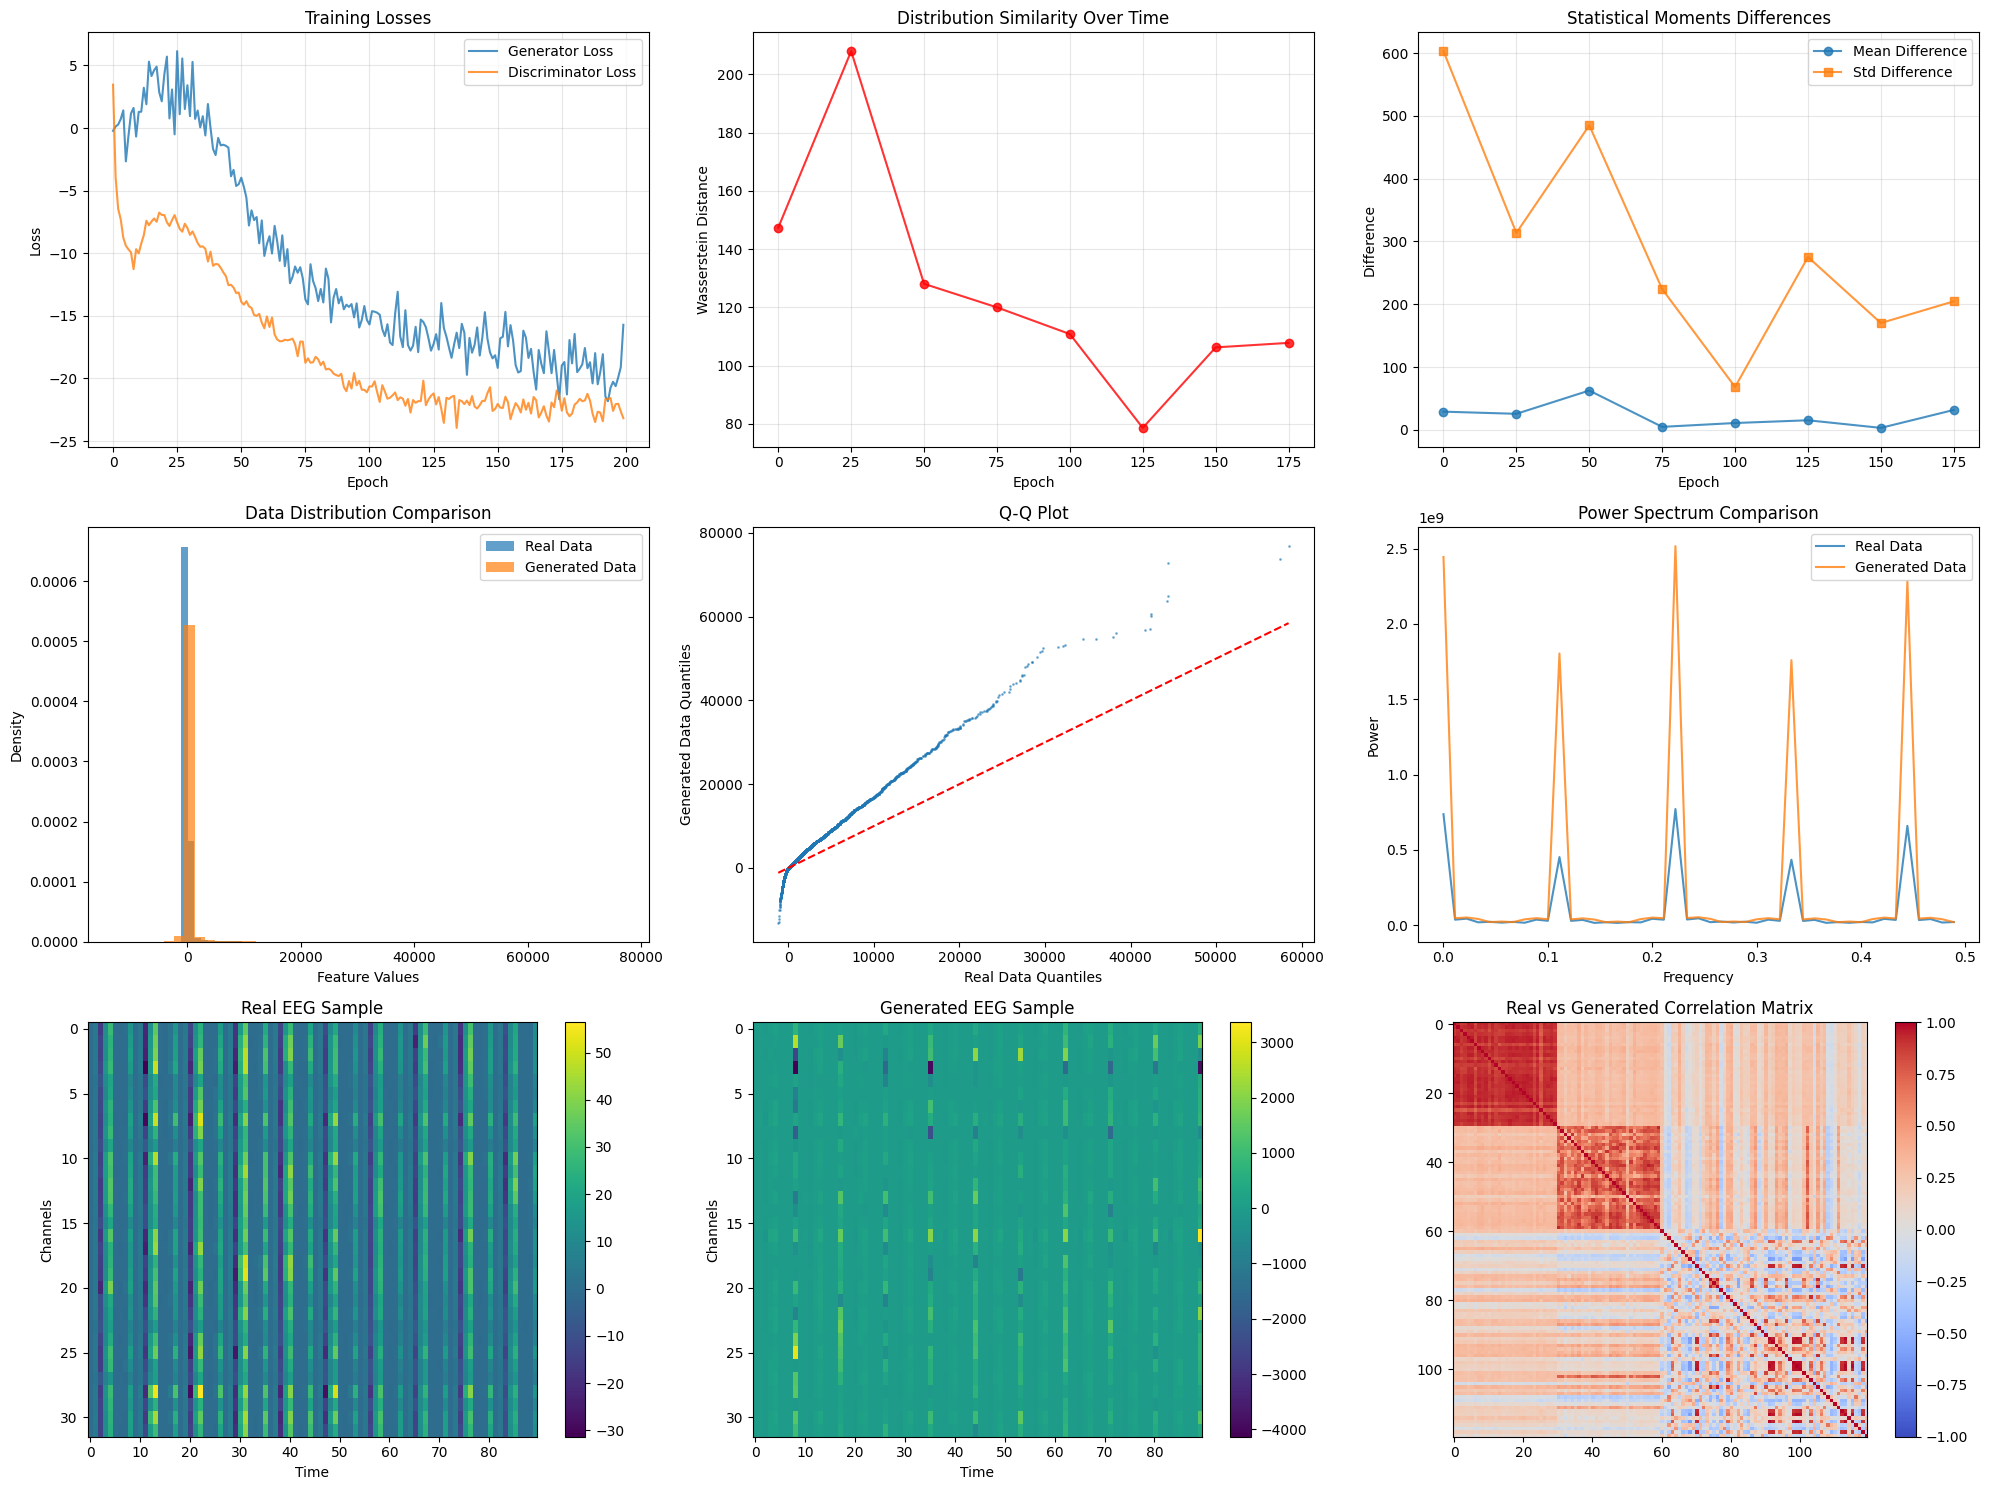


ENHANCED GAN FINAL EVALUATION METRICS
Wasserstein Distance:         107.808183
KS Test Statistic:            0.072067 (p=0.0000e+00)
Mean Difference:              31.828445
Standard Deviation Diff:      204.736206
Skewness Difference:          11.972808
Kurtosis Difference:          960.723058
Mean Squared Error:           4687490.500000
Root Mean Squared Error:      2165.061279
Mean Absolute Error:          354.347168
Pearson Correlation:          0.0455 (p=2.7125e-251)
Power Spectrum Difference:    0.3018

QUALITY ASSESSMENT:
🔴 NEEDS IMPROVEMENT: Significant distribution differences


In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, wasserstein_distance
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set device and random seeds
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)
np.random.seed(42)

# IMPROVED Hyperparameters
nz = 128  # Increased noise dimension for more diversity
num_features = 2880  # 32 * 90 flattened
num_emotion_dims = 4
lr_g = 0.0001  # Lower learning rate for generator (more stable)
lr_d = 0.0002  # Higher learning rate for discriminator
beta1 = 0.5
batch_size = 32
num_epochs = 300  # More epochs for better convergence

# IMPROVED Generator with residual connections and spectral normalization
class ImprovedGenerator(nn.Module):
    def __init__(self):
        super(ImprovedGenerator, self).__init__()
        
        # Use spectral normalization for training stability
        from torch.nn.utils import spectral_norm
        
        self.input_layer = nn.Linear(nz + num_emotion_dims, 256)
        
        # Residual blocks for better gradient flow
        self.block1 = nn.Sequential(
            spectral_norm(nn.Linear(256, 512)),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.2)
        )
        
        self.block2 = nn.Sequential(
            spectral_norm(nn.Linear(512, 1024)),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.2)
        )
        
        self.block3 = nn.Sequential(
            spectral_norm(nn.Linear(1024, 2048)),
            nn.BatchNorm1d(2048),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.2)
        )
        
        self.output_layer = nn.Linear(2048, num_features)
        
        # Initialize weights properly
        self.apply(self._init_weights)
    
    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight)
            if m.bias is not None:
                nn.init.zeros_(m.bias)
    
    def forward(self, noise, emotion_labels):
        x = torch.cat([noise, emotion_labels], dim=1)
        x = torch.relu(self.input_layer(x))
        
        # Residual connections where possible
        x1 = self.block1(x)
        x2 = self.block2(x1)
        x3 = self.block3(x2)
        
        # Output without activation - let it learn the right range
        return self.output_layer(x3)

# IMPROVED Discriminator with gradient penalty capability
class ImprovedDiscriminator(nn.Module):
    def __init__(self):
        super(ImprovedDiscriminator, self).__init__()
        
        from torch.nn.utils import spectral_norm
        
        self.model = nn.Sequential(
            spectral_norm(nn.Linear(num_features + num_emotion_dims, 1024)),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            
            spectral_norm(nn.Linear(1024, 512)),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            
            spectral_norm(nn.Linear(512, 256)),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            
            spectral_norm(nn.Linear(256, 128)),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(128, 1)
            
        )
        
        self.apply(self._init_weights)
    
    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight)
            if m.bias is not None:
                nn.init.zeros_(m.bias)

    def forward(self, eeg_data, emotion_labels):
        input_tensor = torch.cat([eeg_data, emotion_labels], dim=1)
        return self.model(input_tensor)

# IMPROVED preprocessing with proper scaling
def improved_preprocess_for_gan(X, y):
    """
    Better preprocessing for GAN training
    """
    # Flatten X
    X_flat = X.reshape(X.shape[0], -1)  # (samples, 2880)
    
    # Use StandardScaler for more stable training
    scaler_X = StandardScaler()
    X_normalized = scaler_X.fit_transform(X_flat)
    
    # Normalize emotion labels properly
    scaler_y = StandardScaler()
    y_normalized = scaler_y.fit_transform(y)
    
    return X_normalized, y_normalized, scaler_X, scaler_y

# Wasserstein Loss with Gradient Penalty (more stable than BCE)
def gradient_penalty(discriminator, real_data, fake_data, emotion_labels, lambda_gp=10):
    """
    Calculate gradient penalty for WGAN-GP
    """
    batch_size = real_data.size(0)
    alpha = torch.rand(batch_size, 1).to(device)
    alpha = alpha.expand_as(real_data)
    
    interpolated = alpha * real_data + (1 - alpha) * fake_data
    interpolated.requires_grad_(True)
    
    # Calculate discriminator output for interpolated data
    d_interpolated = discriminator(interpolated, emotion_labels)
    
    # Calculate gradients
    gradients = torch.autograd.grad(
        outputs=d_interpolated,
        inputs=interpolated,
        grad_outputs=torch.ones_like(d_interpolated),
        create_graph=True,
        retain_graph=True,
        only_inputs=True
    )[0]
    
    gradients = gradients.view(batch_size, -1)
    gradient_norm = gradients.norm(2, dim=1)
    penalty = lambda_gp * ((gradient_norm - 1) ** 2).mean()
    
    return penalty

# Comprehensive evaluation metrics
def calculate_generation_metrics(real_data, fake_data):
    """
    Calculate comprehensive metrics for generated vs real data
    """
    # Flatten for calculations
    real_flat = real_data.flatten()
    fake_flat = fake_data.flatten()
    
    metrics = {}
    
    # Distribution similarity
    metrics['wasserstein_distance'] = wasserstein_distance(real_flat, fake_flat)
    metrics['ks_statistic'], metrics['ks_p_value'] = stats.ks_2samp(real_flat, fake_flat)
    
    # Statistical moments
    metrics['mean_diff'] = abs(np.mean(real_flat) - np.mean(fake_flat))
    metrics['std_diff'] = abs(np.std(real_flat) - np.std(fake_flat))
    metrics['skewness_diff'] = abs(stats.skew(real_flat) - stats.skew(fake_flat))
    metrics['kurtosis_diff'] = abs(stats.kurtosis(real_flat) - stats.kurtosis(fake_flat))
    
    # Correlation with real data patterns
    if len(real_flat) == len(fake_flat):
        correlation, p_value = pearsonr(real_flat, fake_flat)
        metrics['correlation'] = correlation
        metrics['correlation_p_value'] = p_value
    
    # MSE and MAE
    if real_data.shape == fake_data.shape:
        metrics['mse'] = mean_squared_error(real_flat, fake_flat)
        metrics['mae'] = mean_absolute_error(real_flat, fake_flat)
        metrics['rmse'] = np.sqrt(metrics['mse'])
    
    # Frequency domain analysis
    real_fft = np.fft.fft(real_data.reshape(-1, 32, 90), axis=-1)
    fake_fft = np.fft.fft(fake_data.reshape(-1, 32, 90), axis=-1)
    
    real_power = np.mean(np.abs(real_fft) ** 2)
    fake_power = np.mean(np.abs(fake_fft) ** 2)
    metrics['power_spectrum_diff'] = abs(real_power - fake_power) / real_power
    
    return metrics

def inception_score(generated_samples, discriminator, emotion_labels, splits=10):
    """
    Calculate Inception Score for generated samples
    """
    discriminator.eval()
    scores = []
    
    with torch.no_grad():
        for i in range(splits):
            part = generated_samples[i * len(generated_samples) // splits:(i + 1) * len(generated_samples) // splits]
            part_emotions = emotion_labels[i * len(emotion_labels) // splits:(i + 1) * len(emotion_labels) // splits]
            
            part_tensor = torch.FloatTensor(part).to(device)
            part_emotions_tensor = torch.FloatTensor(part_emotions).to(device)
            
            pred = torch.sigmoid(discriminator(part_tensor, part_emotions_tensor))
            
            # Calculate score
            p_y = pred.mean(dim=0, keepdim=True)
            scores.append(torch.exp(torch.mean(pred * (torch.log(pred) - torch.log(p_y)))))
    
    return torch.mean(torch.stack(scores)).item(), torch.std(torch.stack(scores)).item()

# IMPROVED training function with comprehensive evaluation
def train_improved_gan(X, y, num_epochs=300, use_wgan_gp=True):
    """
    Enhanced GAN training with evaluation metrics
    """
    print(f"Training Enhanced GAN on data: X{X.shape}, y{y.shape}")
    
    # Split data for evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Preprocess data
    X_train_proc, y_train_proc, scaler_X, scaler_y = improved_preprocess_for_gan(X_train, y_train)
    X_test_proc, y_test_proc, _, _ = improved_preprocess_for_gan(X_test, y_test)
    
    # Convert to tensors
    X_train_tensor = torch.FloatTensor(X_train_proc).to(device)
    y_train_tensor = torch.FloatTensor(y_train_proc).to(device)
    X_test_tensor = torch.FloatTensor(X_test_proc).to(device)
    y_test_tensor = torch.FloatTensor(y_test_proc).to(device)
    
    # Create dataloader
    dataset = TensorDataset(X_train_tensor, y_train_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    
    # Initialize improved networks
    generator = ImprovedGenerator().to(device)
    discriminator = ImprovedDiscriminator().to(device)
    
    print(f"Generator parameters: {sum(p.numel() for p in generator.parameters()):,}")
    print(f"Discriminator parameters: {sum(p.numel() for p in discriminator.parameters()):,}")
    
    # Optimizers with different learning rates
    optimizer_G = optim.Adam(generator.parameters(), lr=lr_g, betas=(beta1, 0.999))
    optimizer_D = optim.Adam(discriminator.parameters(), lr=lr_d, betas=(beta1, 0.999))
    
    # Learning rate schedulers
    scheduler_G = optim.lr_scheduler.ExponentialLR(optimizer_G, gamma=0.995)
    scheduler_D = optim.lr_scheduler.ExponentialLR(optimizer_D, gamma=0.995)
    
    # Loss function
    if use_wgan_gp:
        criterion = None  # Use Wasserstein loss
    else:
        criterion = nn.BCEWithLogitsLoss()
    
    # Training history
    G_losses = []
    D_losses = []
    evaluation_history = []
    
    print("Starting Enhanced GAN Training...")
    
    for epoch in range(num_epochs):
        epoch_g_loss = 0
        epoch_d_loss = 0
        
        for i, (real_data, real_labels) in enumerate(dataloader):
            batch_size_current = real_data.size(0)
            
            # ---------------------
            # Train Discriminator (more frequently for stability)
            # ---------------------
            for _ in range(2):  # Train D twice per G training
                optimizer_D.zero_grad()
                
                if use_wgan_gp:
                    # Wasserstein loss with gradient penalty
                    # Real data
                    d_real = discriminator(real_data, real_labels).mean()
                    
                    # Fake data
                    noise = torch.randn(batch_size_current, nz).to(device)
                    fake_data = generator(noise, real_labels).detach()
                    d_fake = discriminator(fake_data, real_labels).mean()
                    
                    # Gradient penalty
                    gp = gradient_penalty(discriminator, real_data, fake_data, real_labels)
                    
                    # Wasserstein loss
                    loss_D = d_fake - d_real + gp
                else:
                    # Standard GAN loss
                    real_labels_disc = torch.ones(batch_size_current, 1).to(device)
                    fake_labels_disc = torch.zeros(batch_size_current, 1).to(device)
                    
                    # Real data
                    output_real = discriminator(real_data, real_labels)
                    loss_D_real = criterion(output_real, real_labels_disc)
                    
                    # Fake data
                    noise = torch.randn(batch_size_current, nz).to(device)
                    fake_data = generator(noise, real_labels).detach()
                    output_fake = discriminator(fake_data, real_labels)
                    loss_D_fake = criterion(output_fake, fake_labels_disc)
                    
                    loss_D = (loss_D_real + loss_D_fake) / 2
                
                loss_D.backward()
                torch.nn.utils.clip_grad_norm_(discriminator.parameters(), 1.0)
                optimizer_D.step()
            
            # -----------------
            # Train Generator
            # -----------------
            optimizer_G.zero_grad()
            
            noise = torch.randn(batch_size_current, nz).to(device)
            fake_data = generator(noise, real_labels)
            
            if use_wgan_gp:
                # Wasserstein loss for generator
                loss_G = -discriminator(fake_data, real_labels).mean()
            else:
                # Standard GAN loss
                output_fake = discriminator(fake_data, real_labels)
                loss_G = criterion(output_fake, torch.ones(batch_size_current, 1).to(device))
            
            loss_G.backward()
            torch.nn.utils.clip_grad_norm_(generator.parameters(), 1.0)
            optimizer_G.step()
            
            epoch_g_loss += loss_G.item()
            epoch_d_loss += loss_D.item()
        
        # Update learning rates
        if epoch > 50:
            scheduler_G.step()
            scheduler_D.step()
        
        # Record losses
        avg_g_loss = epoch_g_loss / len(dataloader)
        avg_d_loss = epoch_d_loss / len(dataloader)
        G_losses.append(avg_g_loss)
        D_losses.append(avg_d_loss)
        
        # Comprehensive evaluation every 25 epochs
        if epoch % 25 == 0:
            print(f'Epoch [{epoch}/{num_epochs}] | G Loss: {avg_g_loss:.4f} | D Loss: {avg_d_loss:.4f}')
            
            # Generate samples for evaluation
            generator.eval()
            with torch.no_grad():
                test_noise = torch.randn(len(X_test), nz).to(device)
                generated_test = generator(test_noise, y_test_tensor)
                generated_test_np = generated_test.cpu().numpy()
                
                # Convert back to original scale
                generated_original = scaler_X.inverse_transform(generated_test_np)
                generated_shaped = generated_original.reshape(-1, 32, 90)
                
                # Calculate metrics
                metrics = calculate_generation_metrics(X_test, generated_shaped)
                evaluation_history.append({
                    'epoch': epoch,
                    'metrics': metrics,
                    'g_loss': avg_g_loss,
                    'd_loss': avg_d_loss
                })
                
                print(f"  Wasserstein Distance: {metrics['wasserstein_distance']:.4f}")
                print(f"  Mean Difference: {metrics['mean_diff']:.4f}")
                print(f"  Power Spectrum Diff: {metrics['power_spectrum_diff']:.4f}")
            
            generator.train()
    
    return generator, discriminator, G_losses, D_losses, evaluation_history, scaler_X, scaler_y

# Comprehensive visualization functions
def plot_comprehensive_results(G_losses, D_losses, evaluation_history, real_samples, fake_samples):
    """
    Create comprehensive visualization of GAN results
    """
    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    
    # 1. Training losses
    axes[0,0].plot(G_losses, label='Generator Loss', alpha=0.8)
    axes[0,0].plot(D_losses, label='Discriminator Loss', alpha=0.8)
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].set_ylabel('Loss')
    axes[0,0].set_title('Training Losses')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Wasserstein distance over time
    epochs = [eval_data['epoch'] for eval_data in evaluation_history]
    wasserstein_dists = [eval_data['metrics']['wasserstein_distance'] for eval_data in evaluation_history]
    axes[0,1].plot(epochs, wasserstein_dists, 'o-', color='red', alpha=0.8)
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Wasserstein Distance')
    axes[0,1].set_title('Distribution Similarity Over Time')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Statistical moments comparison
    mean_diffs = [eval_data['metrics']['mean_diff'] for eval_data in evaluation_history]
    std_diffs = [eval_data['metrics']['std_diff'] for eval_data in evaluation_history]
    axes[0,2].plot(epochs, mean_diffs, 'o-', label='Mean Difference', alpha=0.8)
    axes[0,2].plot(epochs, std_diffs, 's-', label='Std Difference', alpha=0.8)
    axes[0,2].set_xlabel('Epoch')
    axes[0,2].set_ylabel('Difference')
    axes[0,2].set_title('Statistical Moments Differences')
    axes[0,2].legend()
    axes[0,2].grid(True, alpha=0.3)
    
    # 4. Data distribution comparison
    axes[1,0].hist(real_samples.flatten(), bins=50, alpha=0.7, label='Real Data', density=True)
    axes[1,0].hist(fake_samples.flatten(), bins=50, alpha=0.7, label='Generated Data', density=True)
    axes[1,0].set_xlabel('Feature Values')
    axes[1,0].set_ylabel('Density')
    axes[1,0].set_title('Data Distribution Comparison')
    axes[1,0].legend()
    
    # 5. Q-Q Plot
    real_flat_sorted = np.sort(real_samples.flatten())
    fake_flat_sorted = np.sort(fake_samples.flatten())
    min_len = min(len(real_flat_sorted), len(fake_flat_sorted))
    axes[1,1].scatter(real_flat_sorted[:min_len], fake_flat_sorted[:min_len], alpha=0.5, s=1)
    axes[1,1].plot([real_flat_sorted.min(), real_flat_sorted.max()], 
                   [real_flat_sorted.min(), real_flat_sorted.max()], 'r--')
    axes[1,1].set_xlabel('Real Data Quantiles')
    axes[1,1].set_ylabel('Generated Data Quantiles')
    axes[1,1].set_title('Q-Q Plot')
    
    # 6. Power spectrum comparison
    real_fft = np.fft.fft(real_samples[:100].reshape(-1, 90), axis=-1)
    fake_fft = np.fft.fft(fake_samples[:100].reshape(-1, 90), axis=-1)
    
    freqs = np.fft.fftfreq(90)[:45]  # Only positive frequencies
    real_power = np.mean(np.abs(real_fft[:, :45]) ** 2, axis=0)
    fake_power = np.mean(np.abs(fake_fft[:, :45]) ** 2, axis=0)
    
    axes[1,2].plot(freqs, real_power, label='Real Data', alpha=0.8)
    axes[1,2].plot(freqs, fake_power, label='Generated Data', alpha=0.8)
    axes[1,2].set_xlabel('Frequency')
    axes[1,2].set_ylabel('Power')
    axes[1,2].set_title('Power Spectrum Comparison')
    axes[1,2].legend()
    
    # 7. Sample EEG comparison
    sample_idx = 0
    im1 = axes[2,0].imshow(real_samples[sample_idx], aspect='auto', cmap='viridis')
    axes[2,0].set_title('Real EEG Sample')
    axes[2,0].set_xlabel('Time')
    axes[2,0].set_ylabel('Channels')
    plt.colorbar(im1, ax=axes[2,0])
    
    im2 = axes[2,1].imshow(fake_samples[sample_idx], aspect='auto', cmap='viridis')
    axes[2,1].set_title('Generated EEG Sample')
    axes[2,1].set_xlabel('Time')
    axes[2,1].set_ylabel('Channels')
    plt.colorbar(im2, ax=axes[2,1])
    
    # 8. Correlation matrix
    if len(real_samples) == len(fake_samples):
        correlation_matrix = np.corrcoef(real_samples.reshape(len(real_samples), -1), 
                                       fake_samples.reshape(len(fake_samples), -1))
        im3 = axes[2,2].imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
        axes[2,2].set_title('Real vs Generated Correlation Matrix')
        plt.colorbar(im3, ax=axes[2,2])
    
    plt.tight_layout()
    plt.show()

def print_final_evaluation(evaluation_history):
    """
    Print comprehensive final evaluation metrics
    """
    if not evaluation_history:
        print("No evaluation history available.")
        return
    
    final_metrics = evaluation_history[-1]['metrics']
    
    print("\n" + "="*60)
    print("ENHANCED GAN FINAL EVALUATION METRICS")
    print("="*60)
    print(f"Wasserstein Distance:         {final_metrics['wasserstein_distance']:.6f}")
    print(f"KS Test Statistic:            {final_metrics['ks_statistic']:.6f} (p={final_metrics['ks_p_value']:.4e})")
    print(f"Mean Difference:              {final_metrics['mean_diff']:.6f}")
    print(f"Standard Deviation Diff:      {final_metrics['std_diff']:.6f}")
    print(f"Skewness Difference:          {final_metrics['skewness_diff']:.6f}")
    print(f"Kurtosis Difference:          {final_metrics['kurtosis_diff']:.6f}")
    
    if 'mse' in final_metrics:
        print(f"Mean Squared Error:           {final_metrics['mse']:.6f}")
        print(f"Root Mean Squared Error:      {final_metrics['rmse']:.6f}")
        print(f"Mean Absolute Error:          {final_metrics['mae']:.6f}")
    
    if 'correlation' in final_metrics:
        print(f"Pearson Correlation:          {final_metrics['correlation']:.4f} (p={final_metrics['correlation_p_value']:.4e})")
    
    print(f"Power Spectrum Difference:    {final_metrics['power_spectrum_diff']:.4f}")
    print("="*60)
    
    # Quality assessment
    print("\nQUALITY ASSESSMENT:")
    wass_dist = final_metrics['wasserstein_distance']
    if wass_dist < 0.1:
        print("🟢 EXCELLENT: Very similar distributions")
    elif wass_dist < 0.3:
        print("🟡 GOOD: Reasonably similar distributions")
    elif wass_dist < 0.5:
        print("🟠 MODERATE: Some differences in distributions")
    else:
        print("🔴 NEEDS IMPROVEMENT: Significant distribution differences")

# Enhanced sample generation with emotion conditioning
def generate_enhanced_samples(generator, emotion_conditions, scaler_X, scaler_y, num_samples=100):
    """
    Generate enhanced samples with proper scaling and evaluation
    """
    generator.eval()
    device = next(generator.parameters()).device
    
    with torch.no_grad():
        # Normalize emotion conditions
        emotion_normalized = scaler_y.transform(emotion_conditions)
        emotion_tensor = torch.FloatTensor(emotion_normalized).to(device)
        
        # Generate noise
        noise = torch.randn(num_samples, nz).to(device)
        
        # Generate samples
        fake_data = generator(noise, emotion_tensor)
        fake_data_np = fake_data.cpu().numpy()
        
        # Convert back to original scale
        fake_data_original = scaler_X.inverse_transform(fake_data_np)
        fake_data_shaped = fake_data_original.reshape(num_samples, 32, 90)
    
    return fake_data_shaped

# Main enhanced training function
def main_enhanced_gan_training(X, y):
    """
    Main function for enhanced GAN training with comprehensive evaluation
    """
    print(f"Enhanced GAN Training - Data shape: X{X.shape}, y{y.shape}")
    
    # Train the enhanced GAN
    generator, discriminator, g_losses, d_losses, eval_history, scaler_X, scaler_y = train_improved_gan(
        X, y, num_epochs=200, use_wgan_gp=True
    )
    
    # Generate test samples
    test_emotions = np.array([[5, 5, 5, 5], [7, 3, 6, 4], [2, 8, 3, 7]] * 20)  # 60 samples
    generated_samples = generate_enhanced_samples(
        generator, test_emotions, scaler_X, scaler_y, num_samples=len(test_emotions)
    )
    
    # Create comprehensive visualizations
    # Use a subset of real data for comparison
    real_subset = X[:len(generated_samples)]
    plot_comprehensive_results(g_losses, d_losses, eval_history, real_subset, generated_samples)
    
    # Print final evaluation
    print_final_evaluation(eval_history)
    
    return generator, discriminator, generated_samples, scaler_X, scaler_y, eval_history

# Usage example:
generator, discriminator, fake_samples, scaler_X, scaler_y, evaluation = main_enhanced_gan_training(X, y)

In [49]:
import pandas as pd
import numpy as np

# Flatten each sample: (num_samples, 32, 90) -> (num_samples, 2880)
num_samples = fake_samples.shape[0]
flattened_samples = fake_samples.reshape(num_samples, -1)

# Optionally, create column names
columns = [f'ch{ch+1}_t{t+1}' for ch in range(32) for t in range(90)]

# Create DataFrame
df = pd.DataFrame(flattened_samples, columns=columns)

# Save to CSV
csv_filename = 'generated_eeg_gan.csv'
df.to_csv(csv_filename, index=False)

print(f"✅ Generated EEG samples saved to {csv_filename}")


✅ Generated EEG samples saved to generated_eeg_gan.csv


In [48]:
import pandas as pd
import numpy as np

# Flatten each sample: (num_samples, 32, 90) -> (num_samples, 2880)
num_samples = fake_samples.shape[0]
flattened_samples = fake_samples.reshape(num_samples, -1)

# Feature columns
columns = [f'ch{ch+1}_t{t+1}' for ch in range(32) for t in range(90)]

# Convert EEG to DataFrame
df_eeg = pd.DataFrame(flattened_samples, columns=columns)

# Example: labels array (num_samples, 4)
# Replace this with your real labels variable
# fake_labels = np.array([[valence, arousal, dominance, liking], ...])
df_labels = pd.DataFrame(fake_labels, columns=['valence', 'arousal', 'dominance', 'liking'])

# Concatenate labels + EEG features
df_full = pd.concat([df_labels, df_eeg], axis=1)

# Save to CSV
csv_filename = 'generated_eeg_gan_with_labels.csv'
df_full.to_csv(csv_filename, index=False)

print(f"✅ Generated EEG samples with labels saved to {csv_filename}")


NameError: name 'fake_labels' is not defined

In [46]:
# Check diversity of generated samples
print("Generated sample statistics:")
print(f"Mean across samples: {fake_samples.mean(axis=0).std()}")
print(f"Std across samples: {fake_samples.std(axis=0).mean()}")

# Compare with real data diversity
real_flat = X.reshape(-1, 2880)
print(f"\nReal data statistics:")
print(f"Mean across samples: {real_flat.mean(axis=0).std()}")
print(f"Std across samples: {real_flat.std(axis=0).mean()}")  #resulst ==mode collaps

Generated sample statistics:
Mean across samples: 562.0335083007812
Std across samples: 468.7106018066406

Real data statistics:
Mean across samples: 408.3255310058594
Std across samples: 474.67742919921875


## VAE

Starting VAE training with data shape: X(960, 32, 90), y(960, 4)
Using device: cuda
Preprocessing data...
Train set: 768 samples
Test set: 192 samples
Model parameters: 3,333,440
Starting VAE training...
Epoch [0/250] | Train Loss: 2769.6652 | Test Loss: 2187.8719 | Recon: 2728.7615 | KL: 40.9037
Epoch [20/250] | Train Loss: 1847.2389 | Test Loss: 1652.5250 | Recon: 1805.6458 | KL: 41.5931
Epoch [40/250] | Train Loss: 1679.2854 | Test Loss: 1588.7288 | Recon: 1628.9540 | KL: 50.3314
Epoch [60/250] | Train Loss: 1441.8007 | Test Loss: 1428.5513 | Recon: 1391.4596 | KL: 50.3411
Epoch [80/250] | Train Loss: 1396.3920 | Test Loss: 1464.1910 | Recon: 1340.0077 | KL: 56.3843
Epoch [100/250] | Train Loss: 1324.6629 | Test Loss: 1322.2825 | Recon: 1262.5888 | KL: 62.0740
Epoch [120/250] | Train Loss: 1250.3526 | Test Loss: 1276.3191 | Recon: 1196.1717 | KL: 54.1808
Epoch [140/250] | Train Loss: 1231.2774 | Test Loss: 1317.5386 | Recon: 1175.2462 | KL: 56.0312
Epoch [160/250] | Train Loss: 1138

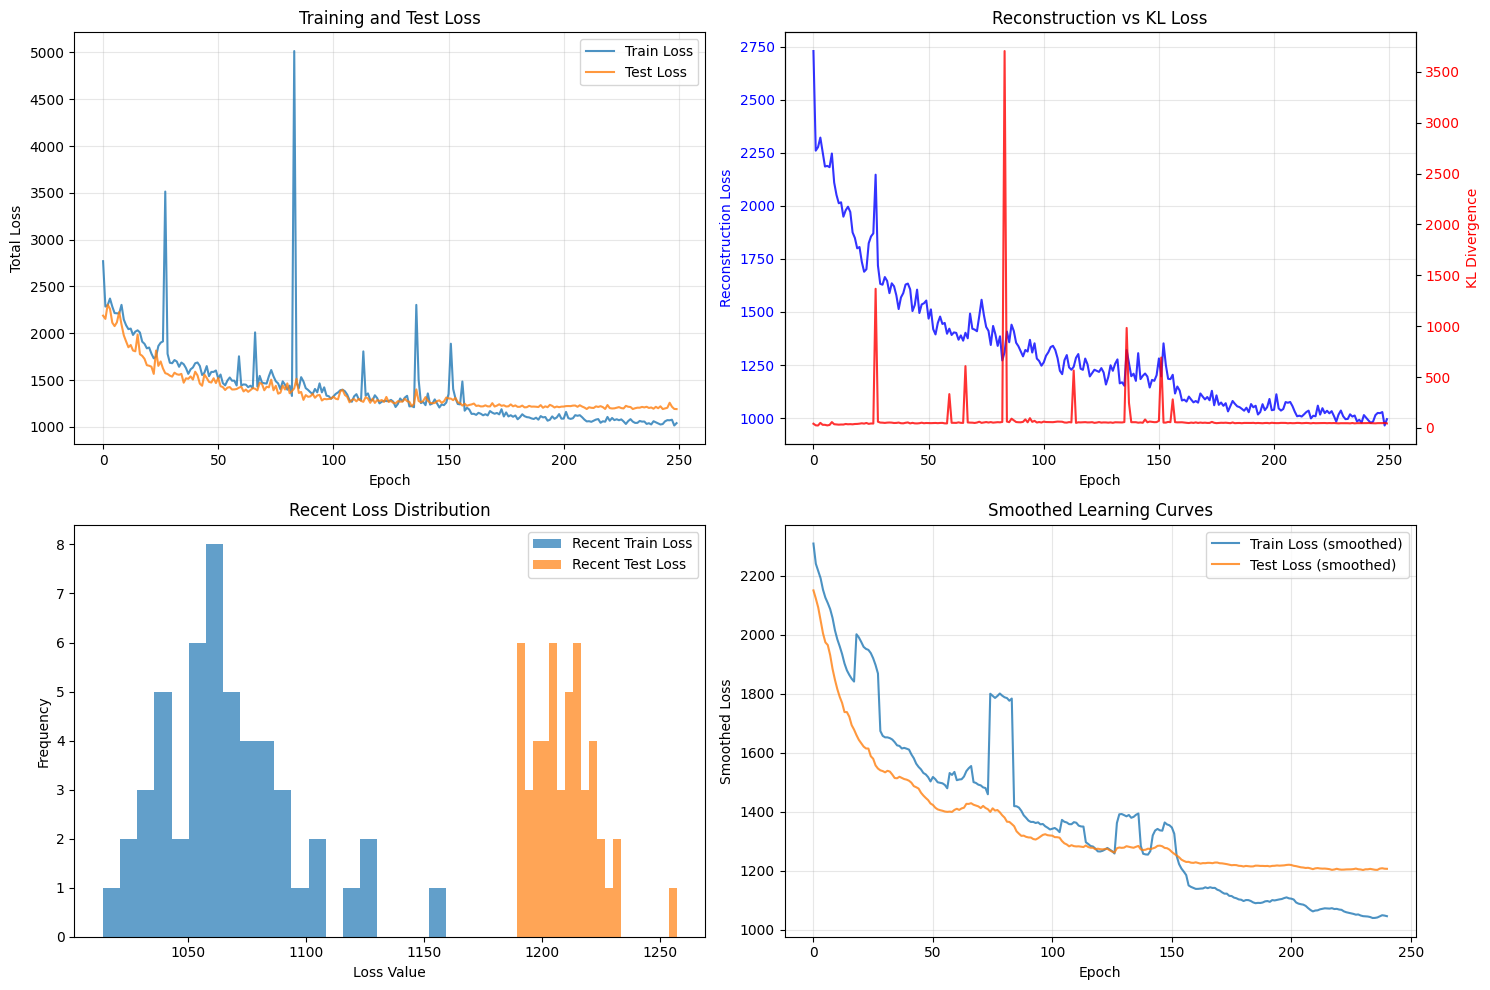


VAE RECONSTRUCTION ACCURACY METRICS
Mean Squared Error (MSE):     0.402254
Root Mean Squared Error:      0.634235
Mean Absolute Error:          0.357896
R-squared Score:              0.5820
Pearson Correlation:          0.7653 (p=0.0000e+00)
Signal-to-Noise Ratio:        3.79 dB
Variance Explained:           0.5820


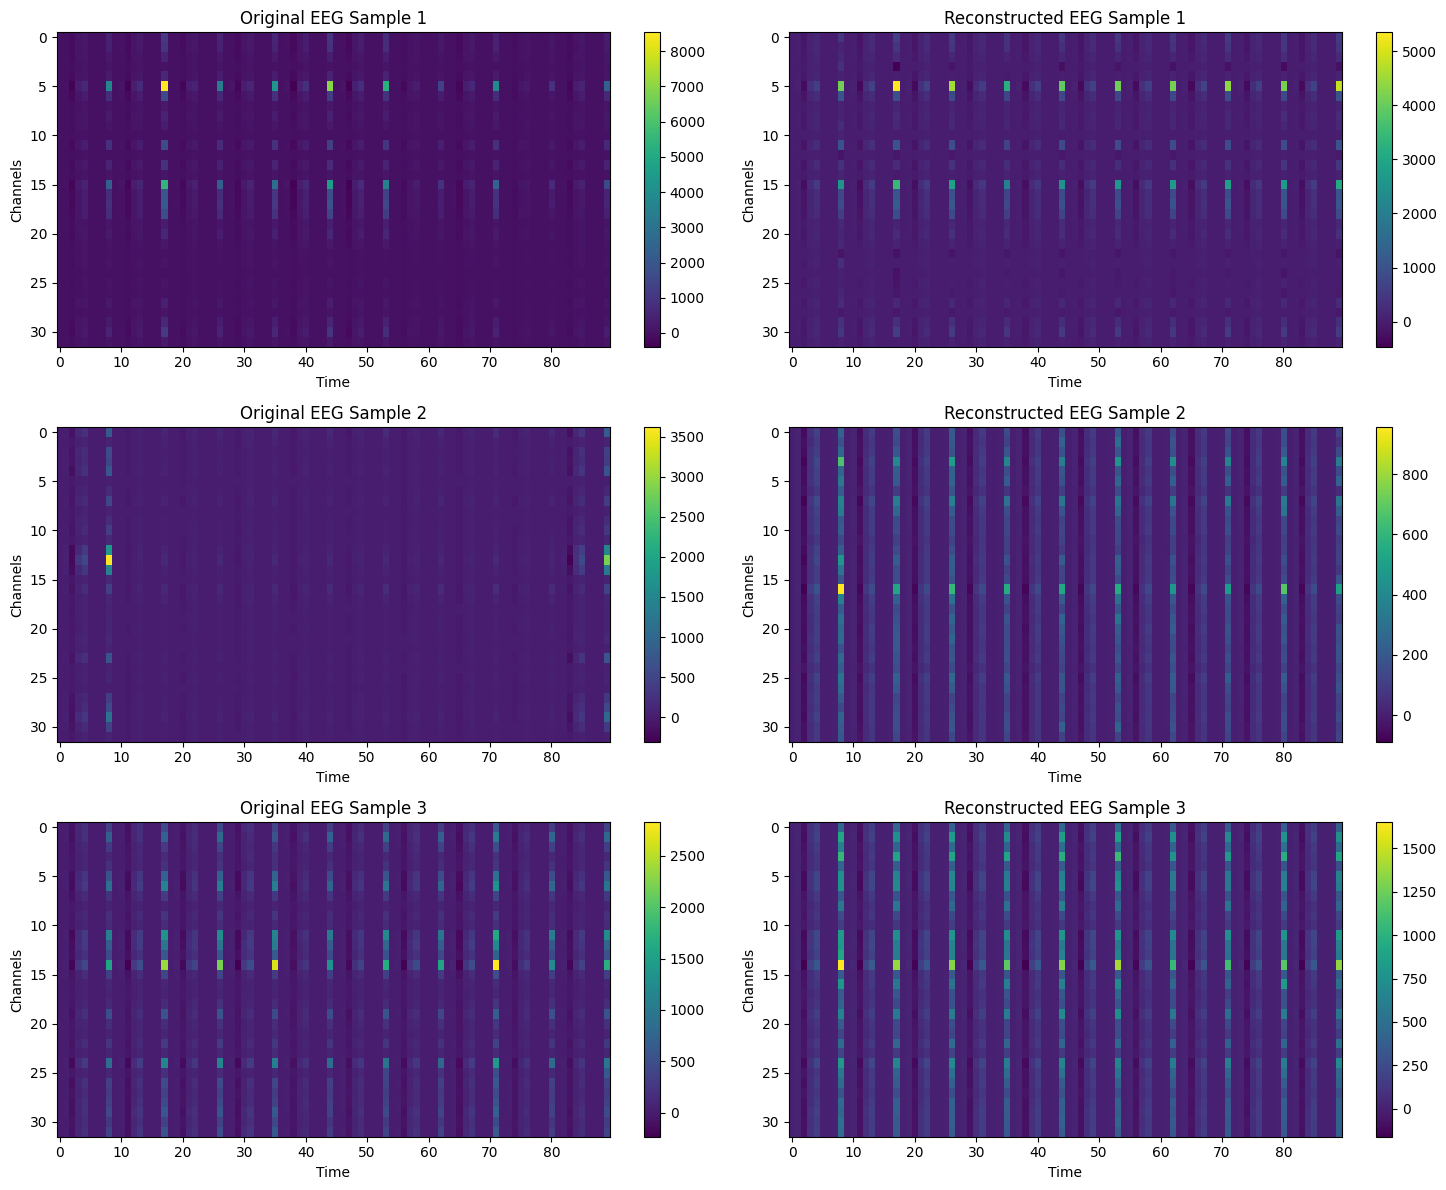


Generated 3 new EEG samples with custom emotion conditions


In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

class ConditionedVAE(nn.Module):
    def __init__(self, input_dim=2880, emotion_dim=4, latent_dim=128, hidden_dim=512):
        super(ConditionedVAE, self).__init__()
        
        self.input_dim = input_dim
        self.emotion_dim = emotion_dim
        self.latent_dim = latent_dim
        
        # encoder: EEG + emos
        self.encoder = nn.Sequential(
            nn.Linear(input_dim + emotion_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, hidden_dim//2),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim//2, hidden_dim//4),
            nn.ReLU()
        )
        
        self.fc_mu = nn.Linear(hidden_dim//4, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim//4, latent_dim)
        
        # Decoder: latent space + emotions -> EEG
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim + emotion_dim, hidden_dim//4),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim//4, hidden_dim//2),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim//2, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, input_dim)
        )
    
    def encode(self, x, emotions):
        x_cond = torch.cat([x, emotions], dim=1)
        h = self.encoder(x_cond)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z, emotions):
        z_cond = torch.cat([z, emotions], dim=1)
        return self.decoder(z_cond)
    
    def forward(self, x, emotions):
        mu, logvar = self.encode(x, emotions)
        z = self.reparameterize(mu, logvar)
        recon_x = self.decode(z, emotions)
        return recon_x, mu, logvar

def vae_loss_function(recon_x, x, mu, logvar, beta=1.0):
    """
    VAE loss = Reconstruction Loss + KL Divergence
    """
    # Reconstruction loss (MSE)
    recon_loss = nn.MSELoss(reduction='sum')(recon_x, x)
    
    # KL divergence
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    
    return recon_loss + beta * kl_loss, recon_loss, kl_loss

def preprocess_data(X, y, method='standardize'):
    """
    Preprocess EEG data and emotion labels
    """
    # Flatten EEG data
    X_flat = X.reshape(X.shape[0], -1)
    
    if method == 'standardize':
        scaler_X = StandardScaler()
        X_processed = scaler_X.fit_transform(X_flat)
    elif method == 'minmax':
        scaler_X = MinMaxScaler(feature_range=(-1, 1))
        X_processed = scaler_X.fit_transform(X_flat)
    
    # Normalize emotion labels
    scaler_y = StandardScaler()
    y_processed = scaler_y.fit_transform(y)
    
    return X_processed, y_processed, scaler_X, scaler_y

def calculate_reconstruction_metrics(original, reconstructed):
    """
    Calculate various reconstruction accuracy metrics
    """
    # Flatten arrays for calculation
    orig_flat = original.flatten()
    recon_flat = reconstructed.flatten()
    
    # Mean Squared Error
    mse = mean_squared_error(orig_flat, recon_flat)
    
    # Root Mean Squared Error
    rmse = np.sqrt(mse)
    
    # Mean Absolute Error
    mae = mean_absolute_error(orig_flat, recon_flat)
    
    # R-squared score
    r2 = r2_score(orig_flat, recon_flat)
    
    # Pearson correlation
    correlation, p_value = pearsonr(orig_flat, recon_flat)
    
    # Signal-to-Noise Ratio
    signal_power = np.mean(orig_flat ** 2)
    noise_power = np.mean((orig_flat - recon_flat) ** 2)
    snr = 10 * np.log10(signal_power / noise_power) if noise_power > 0 else float('inf')
    
    # Percentage of variance explained
    variance_explained = 1 - (np.var(orig_flat - recon_flat) / np.var(orig_flat))
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'Correlation': correlation,
        'P_value': p_value,
        'SNR_dB': snr,
        'Variance_Explained': variance_explained
    }

def train_vae_with_evaluation(X, y, num_epochs=200, batch_size=32, lr=0.001, 
                             latent_dim=128, beta=1.0, test_size=0.2):
    """
    Complete VAE training with comprehensive evaluation
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Preprocess data
    print("Preprocessing data...")
    X_processed, y_processed, scaler_X, scaler_y = preprocess_data(X, y)
    
    # Split data into train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y_processed, test_size=test_size, random_state=42, stratify=None
    )
    
    print(f"Train set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")
    
    # Convert to tensors
    X_train_tensor = torch.FloatTensor(X_train).to(device)
    y_train_tensor = torch.FloatTensor(y_train).to(device)
    X_test_tensor = torch.FloatTensor(X_test).to(device)
    y_test_tensor = torch.FloatTensor(y_test).to(device)
    
    # Create datasets and dataloaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Initialize model
    model = ConditionedVAE(
        input_dim=X_processed.shape[1], 
        emotion_dim=y_processed.shape[1], 
        latent_dim=latent_dim
    ).to(device)
    
    print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")
    
    # Optimizer
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=20, factor=0.5)
    
    # Training history
    train_losses = []
    test_losses = []
    train_recon_losses = []
    train_kl_losses = []
    
    print("Starting VAE training...")
    
    best_test_loss = float('inf')
    patience_counter = 0
    patience = 50
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0
        train_recon_loss = 0
        train_kl_loss = 0
        
        for batch_idx, (data, emotions) in enumerate(train_loader):
            optimizer.zero_grad()
            
            recon_data, mu, logvar = model(data, emotions)
            loss, recon_loss, kl_loss = vae_loss_function(recon_data, data, mu, logvar, beta)
            
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            train_recon_loss += recon_loss.item()
            train_kl_loss += kl_loss.item()
        
        # Evaluation phase
        model.eval()
        test_loss = 0
        
        with torch.no_grad():
            for data, emotions in test_loader:
                recon_data, mu, logvar = model(data, emotions)
                loss, _, _ = vae_loss_function(recon_data, data, mu, logvar, beta)
                test_loss += loss.item()
        
        # Calculate average losses
        avg_train_loss = train_loss / len(train_loader.dataset)
        avg_test_loss = test_loss / len(test_loader.dataset)
        avg_recon_loss = train_recon_loss / len(train_loader.dataset)
        avg_kl_loss = train_kl_loss / len(train_loader.dataset)
        
        # Store losses
        train_losses.append(avg_train_loss)
        test_losses.append(avg_test_loss)
        train_recon_losses.append(avg_recon_loss)
        train_kl_losses.append(avg_kl_loss)
        
        # Learning rate scheduling
        scheduler.step(avg_test_loss)
        
        # Early stopping
        if avg_test_loss < best_test_loss:
            best_test_loss = avg_test_loss
            patience_counter = 0
            # Save best model
            torch.save(model.state_dict(), 'best_vae_model.pth')
        else:
            patience_counter += 1
        
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break
        
        # Print progress
        if epoch % 20 == 0 or epoch == num_epochs - 1:
            print(f'Epoch [{epoch}/{num_epochs}] | '
                  f'Train Loss: {avg_train_loss:.4f} | '
                  f'Test Loss: {avg_test_loss:.4f} | '
                  f'Recon: {avg_recon_loss:.4f} | '
                  f'KL: {avg_kl_loss:.4f}')
    
    # Load best model
    model.load_state_dict(torch.load('best_vae_model.pth'))
    
    return model, train_losses, test_losses, train_recon_losses, train_kl_losses, scaler_X, scaler_y, X_test, y_test

def comprehensive_evaluation(model, X_test, y_test, scaler_X, original_shape=(32, 90)):
    """
    Comprehensive evaluation of trained VAE
    """
    device = next(model.parameters()).device
    model.eval()
    
    # Convert test data to tensors
    X_test_tensor = torch.FloatTensor(X_test).to(device)
    y_test_tensor = torch.FloatTensor(y_test).to(device)
    
    with torch.no_grad():
        # Get reconstructions
        recon_data, mu, logvar = model(X_test_tensor, y_test_tensor)
        recon_data_np = recon_data.cpu().numpy()
    
    # Calculate reconstruction metrics
    metrics = calculate_reconstruction_metrics(X_test, recon_data_np)
    
    print("\n" + "="*50)
    print("VAE RECONSTRUCTION ACCURACY METRICS")
    print("="*50)
    print(f"Mean Squared Error (MSE):     {metrics['MSE']:.6f}")
    print(f"Root Mean Squared Error:      {metrics['RMSE']:.6f}")
    print(f"Mean Absolute Error:          {metrics['MAE']:.6f}")
    print(f"R-squared Score:              {metrics['R2']:.4f}")
    print(f"Pearson Correlation:          {metrics['Correlation']:.4f} (p={metrics['P_value']:.4e})")
    print(f"Signal-to-Noise Ratio:        {metrics['SNR_dB']:.2f} dB")
    print(f"Variance Explained:           {metrics['Variance_Explained']:.4f}")
    print("="*50)
    
    # Convert back to original shape for visualization
    original_reshaped = scaler_X.inverse_transform(X_test).reshape(-1, *original_shape)
    recon_reshaped = scaler_X.inverse_transform(recon_data_np).reshape(-1, *original_shape)
    
    return metrics, original_reshaped, recon_reshaped, mu.cpu().numpy(), logvar.cpu().numpy()

def plot_training_results(train_losses, test_losses, train_recon_losses, train_kl_losses):
    """
    Plot training curves and losses
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Total loss
    axes[0,0].plot(train_losses, label='Train Loss', alpha=0.8)
    axes[0,0].plot(test_losses, label='Test Loss', alpha=0.8)
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].set_ylabel('Total Loss')
    axes[0,0].set_title('Training and Test Loss')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Reconstruction and KL losses
    axes[0,1].plot(train_recon_losses, label='Reconstruction Loss', color='blue', alpha=0.8)
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Reconstruction Loss', color='blue')
    axes[0,1].tick_params(axis='y', labelcolor='blue')
    axes[0,1].grid(True, alpha=0.3)
    
    ax2 = axes[0,1].twinx()
    ax2.plot(train_kl_losses, label='KL Divergence', color='red', alpha=0.8)
    ax2.set_ylabel('KL Divergence', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    axes[0,1].set_title('Reconstruction vs KL Loss')
    
    # Loss distribution
    axes[1,0].hist(train_losses[-50:], bins=20, alpha=0.7, label='Recent Train Loss')
    axes[1,0].hist(test_losses[-50:], bins=20, alpha=0.7, label='Recent Test Loss')
    axes[1,0].set_xlabel('Loss Value')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].set_title('Recent Loss Distribution')
    axes[1,0].legend()
    
    # Learning curve smoothed
    window = 10
    if len(train_losses) > window:
        train_smooth = np.convolve(train_losses, np.ones(window)/window, mode='valid')
        test_smooth = np.convolve(test_losses, np.ones(window)/window, mode='valid')
        axes[1,1].plot(train_smooth, label=f'Train Loss (smoothed)', alpha=0.8)
        axes[1,1].plot(test_smooth, label=f'Test Loss (smoothed)', alpha=0.8)
        axes[1,1].set_xlabel('Epoch')
        axes[1,1].set_ylabel('Smoothed Loss')
        axes[1,1].set_title('Smoothed Learning Curves')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_reconstruction_comparison(original, reconstructed, num_samples=3):
    """
    Visualize original vs reconstructed EEG data
    """
    fig, axes = plt.subplots(num_samples, 2, figsize=(15, 4*num_samples))
    
    for i in range(num_samples):
        # Original EEG
        im1 = axes[i,0].imshow(original[i], aspect='auto', cmap='viridis')
        axes[i,0].set_title(f'Original EEG Sample {i+1}')
        axes[i,0].set_xlabel('Time')
        axes[i,0].set_ylabel('Channels')
        plt.colorbar(im1, ax=axes[i,0])
        
        # Reconstructed EEG
        im2 = axes[i,1].imshow(reconstructed[i], aspect='auto', cmap='viridis')
        axes[i,1].set_title(f'Reconstructed EEG Sample {i+1}')
        axes[i,1].set_xlabel('Time')
        axes[i,1].set_ylabel('Channels')
        plt.colorbar(im2, ax=axes[i,1])
    
    plt.tight_layout()
    plt.show()

def generate_new_samples(model, emotion_conditions, scaler_X, scaler_y, num_samples=10):
    """
    Generate new EEG samples given emotion conditions
    """
    device = next(model.parameters()).device
    model.eval()
    
    # Normalize emotion conditions
    emotion_normalized = scaler_y.transform(emotion_conditions)
    emotion_tensor = torch.FloatTensor(emotion_normalized).to(device)
    
    with torch.no_grad():
        # Sample from prior
        z = torch.randn(num_samples, model.latent_dim).to(device)
        
        # Decode with emotion conditions
        generated = model.decode(z, emotion_tensor)
        generated_np = generated.cpu().numpy()
        
        # Convert back to original scale
        generated_original = scaler_X.inverse_transform(generated_np)
        generated_shaped = generated_original.reshape(num_samples, 32, 90)
    
    return generated_shaped

# Main training and evaluation function
def main_vae_training(X, y):
    """
    Complete VAE training pipeline with all metrics
    """
    print(f"Starting VAE training with data shape: X{X.shape}, y{y.shape}")
    
    # Train the VAE
    model, train_losses, test_losses, train_recon_losses, train_kl_losses, scaler_X, scaler_y, X_test, y_test = train_vae_with_evaluation(
        X, y, num_epochs=250, batch_size=32, lr=0.001, latent_dim=128, beta=1.0
    )
    
    # Plot training results
    plot_training_results(train_losses, test_losses, train_recon_losses, train_kl_losses)
    
    # Comprehensive evaluation
    metrics, original_samples, recon_samples, mu, logvar = comprehensive_evaluation(
        model, X_test, y_test, scaler_X
    )
    
    # Visualize reconstructions
    plot_reconstruction_comparison(original_samples, recon_samples, num_samples=3)
    
    # Generate new samples
    test_emotions = [[5, 5, 5, 5], [7, 3, 6, 4], [2, 8, 3, 7]]  # Different emotion conditions
    generated_samples = generate_new_samples(model, test_emotions, scaler_X, scaler_y, len(test_emotions))
    
    print(f"\nGenerated {len(generated_samples)} new EEG samples with custom emotion conditions")
    
    return model, metrics, generated_samples, scaler_X, scaler_y

model, metrics, generated_samples, scaler_X, scaler_y = main_vae_training(X, y)


## GAN 2.0 with labels

Unconditional GAN Training - Generates both EEG and emotions
Training Unconditional GAN - Data shape: X(960, 32, 90), y(960, 4)
Generator parameters: 23,422,916
Discriminator parameters: 3,649,889
Starting Unconditional GAN Training...
Epoch [0/200] | G Loss: 0.0695 | D Loss: 4.0245
  EEG Wasserstein: 165.0805
  Emotion Correlation: 0.4133
Epoch [25/200] | G Loss: 10.7772 | D Loss: -7.1003
  EEG Wasserstein: 231.5343
  Emotion Correlation: 0.4198
Epoch [50/200] | G Loss: 10.5412 | D Loss: -9.1478
  EEG Wasserstein: 151.1154
  Emotion Correlation: 0.1708
Epoch [75/200] | G Loss: 6.6419 | D Loss: -10.5004
  EEG Wasserstein: 130.0788
  Emotion Correlation: 0.2571
Epoch [100/200] | G Loss: 6.3920 | D Loss: -12.9643
  EEG Wasserstein: 112.5554
  Emotion Correlation: 0.3448
Epoch [125/200] | G Loss: 2.0338 | D Loss: -15.4741
  EEG Wasserstein: 113.1340
  Emotion Correlation: 0.2898
Epoch [150/200] | G Loss: 5.4479 | D Loss: -15.5397
  EEG Wasserstein: 105.2471
  Emotion Correlation: 0.3829
E

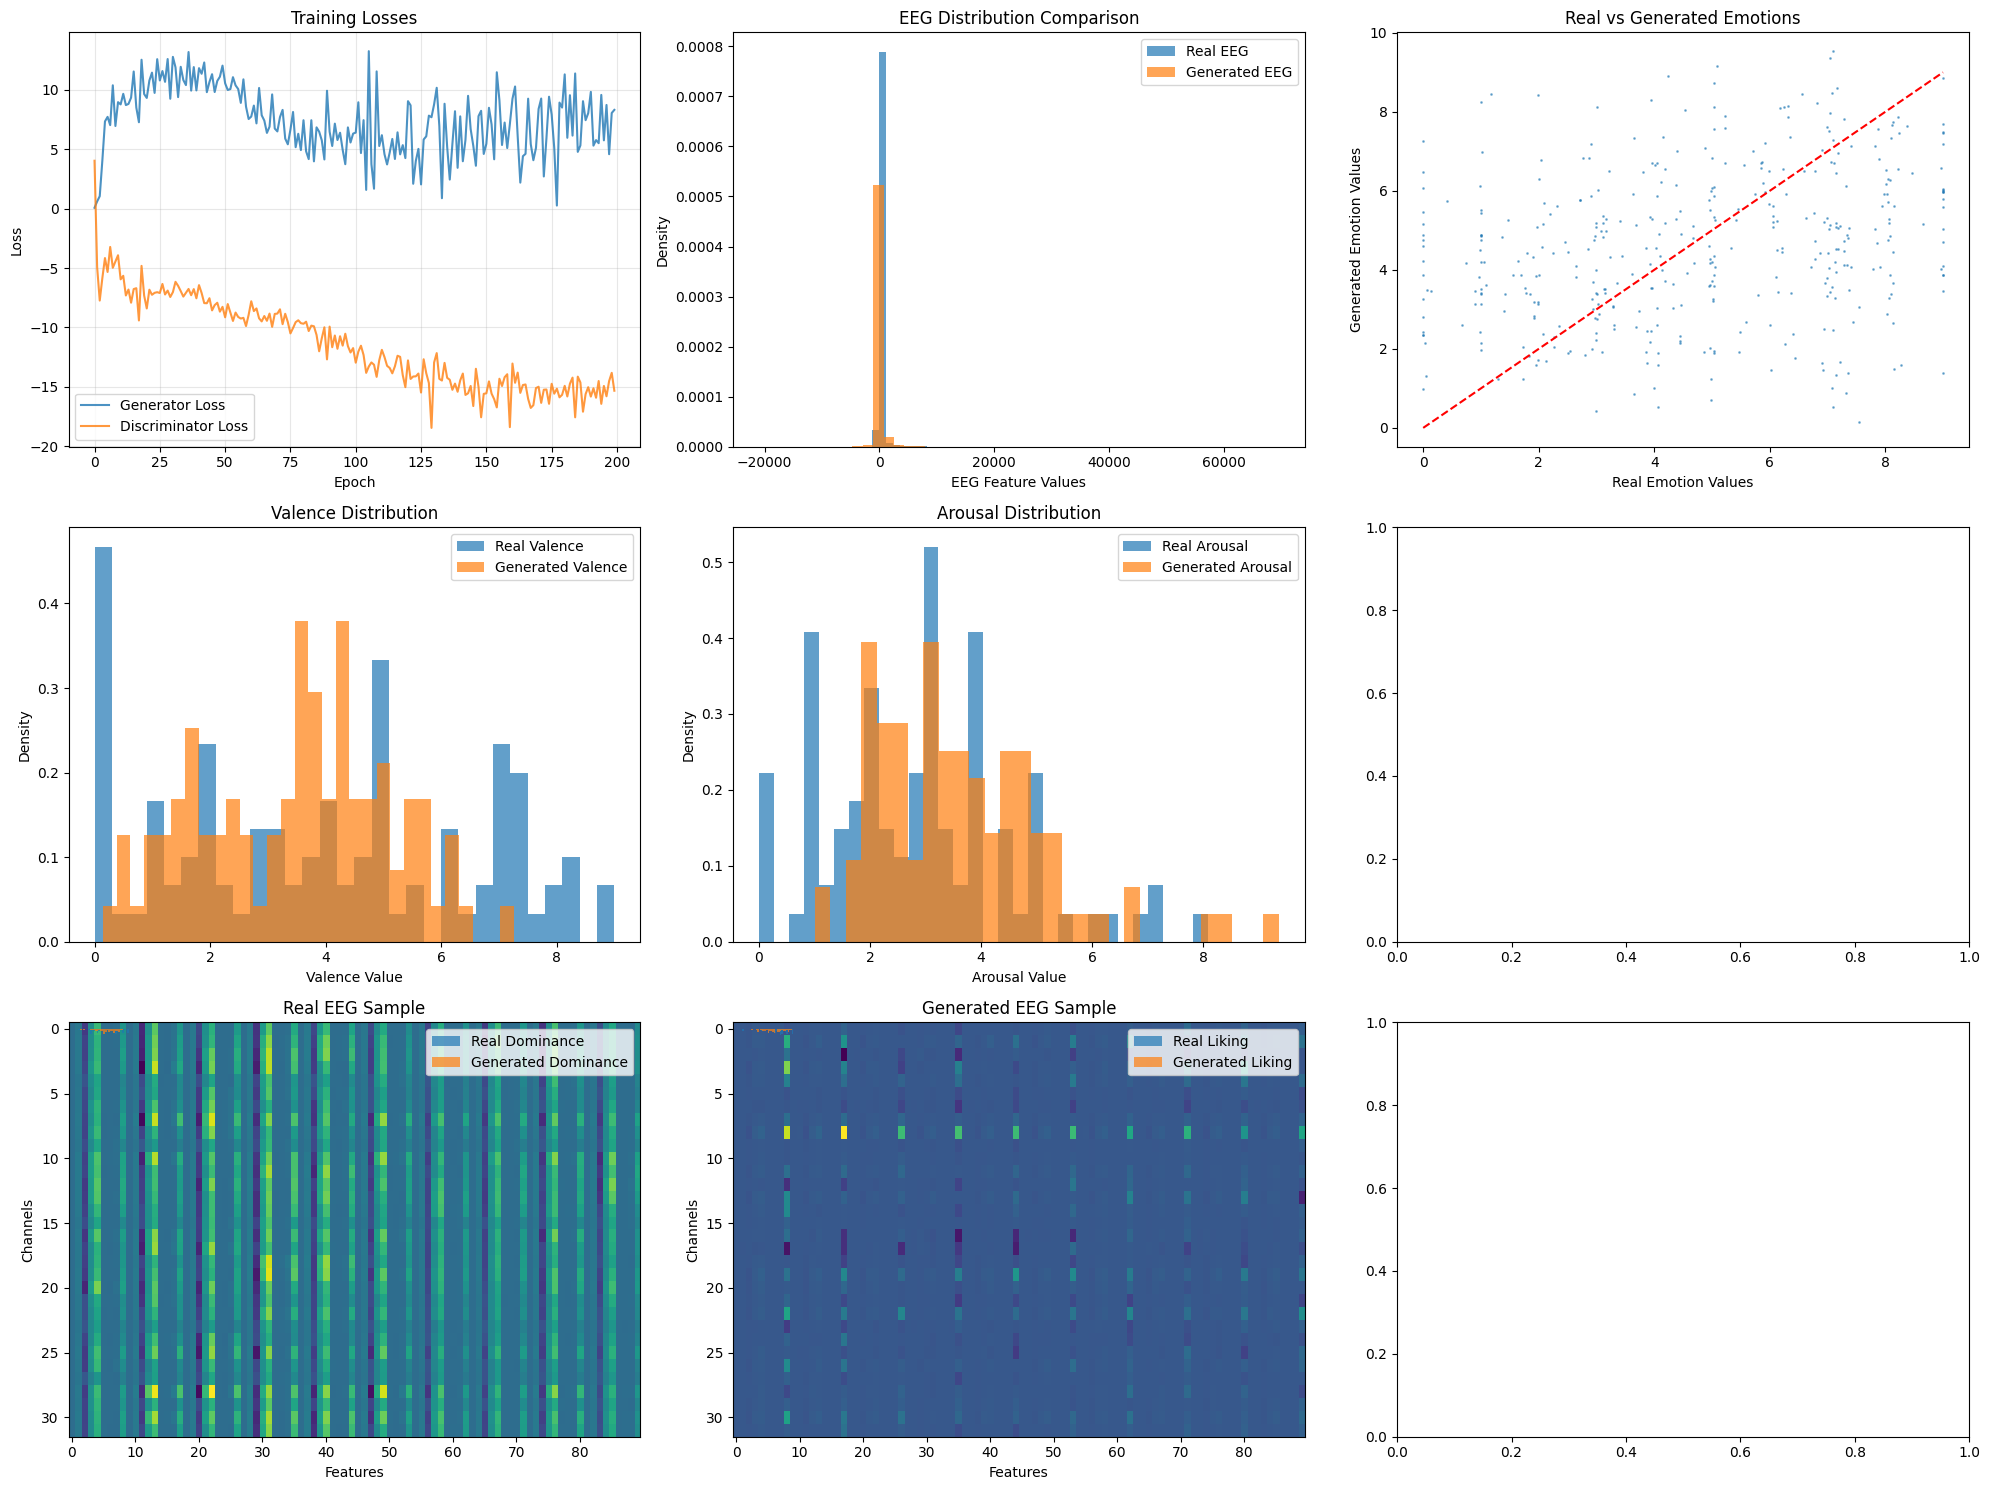

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, wasserstein_distance
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set device and random seeds
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)
np.random.seed(42)

# MODIFIED Hyperparameters for unconditional generation
nz = 128  # Noise dimension
num_eeg_features = 2880  # 32 * 90 flattened EEG features
num_emotion_dims = 4  # Valence, Arousal, Dominance, Liking
total_output_features = num_eeg_features + num_emotion_dims  # 2884 total outputs
lr_g = 0.0001
lr_d = 0.0002
beta1 = 0.5
batch_size = 32
num_epochs = 300

# UNCONDITIONAL Generator - generates both EEG and emotions
class UnconditionalGenerator(nn.Module):
    def __init__(self):
        super(UnconditionalGenerator, self).__init__()
        
        from torch.nn.utils import spectral_norm
        
        self.main = nn.Sequential(
            # Input: noise vector only
            spectral_norm(nn.Linear(nz, 512)),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.2),
            
            spectral_norm(nn.Linear(512, 1024)),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.2),
            
            spectral_norm(nn.Linear(1024, 2048)),
            nn.BatchNorm1d(2048),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.2),
            
            spectral_norm(nn.Linear(2048, 4096)),
            nn.BatchNorm1d(4096),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.2),
        )
        
        # Separate output heads for EEG and emotions
        self.eeg_head = nn.Linear(4096, num_eeg_features)
        self.emotion_head = nn.Sequential(
            nn.Linear(4096, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, num_emotion_dims)
        )
        
        self.apply(self._init_weights)
    
    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight)
            if m.bias is not None:
                nn.init.zeros_(m.bias)
    
    def forward(self, noise):
        # Generate shared features
        shared_features = self.main(noise)
        
        # Generate EEG features
        eeg_output = self.eeg_head(shared_features)
        
        # Generate emotion labels
        emotion_output = self.emotion_head(shared_features)
        
        # Concatenate outputs
        full_output = torch.cat([eeg_output, emotion_output], dim=1)
        
        return full_output, eeg_output, emotion_output

# UNCONDITIONAL Discriminator - evaluates both EEG and emotions
class UnconditionalDiscriminator(nn.Module):
    def __init__(self):
        super(UnconditionalDiscriminator, self).__init__()
        
        from torch.nn.utils import spectral_norm
        
        # Separate processing for EEG and emotions
        self.eeg_processor = nn.Sequential(
            spectral_norm(nn.Linear(num_eeg_features, 1024)),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            
            spectral_norm(nn.Linear(1024, 512)),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
        )
        
        self.emotion_processor = nn.Sequential(
            spectral_norm(nn.Linear(num_emotion_dims, 64)),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            
            spectral_norm(nn.Linear(64, 32)),
            nn.LeakyReLU(0.2, inplace=True),
        )
        
        # Combined processing
        self.combined_processor = nn.Sequential(
            spectral_norm(nn.Linear(512 + 32, 256)),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            
            spectral_norm(nn.Linear(256, 128)),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(128, 1)
        )
        
        self.apply(self._init_weights)
    
    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight)
            if m.bias is not None:
                nn.init.zeros_(m.bias)

    def forward(self, combined_input):
        # Split input into EEG and emotion parts
        eeg_features = combined_input[:, :num_eeg_features]
        emotion_features = combined_input[:, num_eeg_features:]
        
        # Process separately
        eeg_processed = self.eeg_processor(eeg_features)
        emotion_processed = self.emotion_processor(emotion_features)
        
        # Combine and get final output
        combined = torch.cat([eeg_processed, emotion_processed], dim=1)
        output = self.combined_processor(combined)
        
        return output

# MODIFIED preprocessing for unconditional generation
def preprocess_for_unconditional_gan(X, y):
    """
    Preprocess data for unconditional GAN training
    """
    # Flatten X
    X_flat = X.reshape(X.shape[0], -1)  # (samples, 2880)
    
    # Standardize EEG features
    scaler_X = StandardScaler()
    X_normalized = scaler_X.fit_transform(X_flat)
    
    # Standardize emotion labels
    scaler_y = StandardScaler()
    y_normalized = scaler_y.fit_transform(y)
    
    # Combine EEG and emotions into single input
    combined_data = np.concatenate([X_normalized, y_normalized], axis=1)
    
    return combined_data, scaler_X, scaler_y

# Gradient penalty for WGAN-GP (modified for unconditional)
def gradient_penalty_unconditional(discriminator, real_data, fake_data, lambda_gp=10):
    """
    Calculate gradient penalty for unconditional WGAN-GP
    """
    batch_size = real_data.size(0)
    alpha = torch.rand(batch_size, 1).to(device)
    alpha = alpha.expand_as(real_data)
    
    interpolated = alpha * real_data + (1 - alpha) * fake_data
    interpolated.requires_grad_(True)
    
    # Calculate discriminator output for interpolated data
    d_interpolated = discriminator(interpolated)
    
    # Calculate gradients
    gradients = torch.autograd.grad(
        outputs=d_interpolated,
        inputs=interpolated,
        grad_outputs=torch.ones_like(d_interpolated),
        create_graph=True,
        retain_graph=True,
        only_inputs=True
    )[0]
    
    gradients = gradients.view(batch_size, -1)
    gradient_norm = gradients.norm(2, dim=1)
    penalty = lambda_gp * ((gradient_norm - 1) ** 2).mean()
    
    return penalty

# Enhanced evaluation metrics for both EEG and emotions
def calculate_unconditional_metrics(real_eeg, real_emotions, fake_eeg, fake_emotions):
    """
    Calculate metrics for both EEG features and emotion labels
    """
    metrics = {}
    
    # EEG metrics
    real_eeg_flat = real_eeg.flatten()
    fake_eeg_flat = fake_eeg.flatten()
    
    metrics['eeg_wasserstein'] = wasserstein_distance(real_eeg_flat, fake_eeg_flat)
    metrics['eeg_mean_diff'] = abs(np.mean(real_eeg_flat) - np.mean(fake_eeg_flat))
    metrics['eeg_std_diff'] = abs(np.std(real_eeg_flat) - np.std(fake_eeg_flat))
    
    # Emotion metrics
    for i, emotion_name in enumerate(['Valence', 'Arousal', 'Dominance', 'Liking']):
        real_emotion = real_emotions[:, i]
        fake_emotion = fake_emotions[:, i]
        
        metrics[f'{emotion_name.lower()}_wasserstein'] = wasserstein_distance(real_emotion, fake_emotion)
        metrics[f'{emotion_name.lower()}_mean_diff'] = abs(np.mean(real_emotion) - np.mean(fake_emotion))
        metrics[f'{emotion_name.lower()}_std_diff'] = abs(np.std(real_emotion) - np.std(fake_emotion))
        
        # Correlation
        if len(real_emotion) == len(fake_emotion):
            corr, p_val = pearsonr(real_emotion, fake_emotion)
            metrics[f'{emotion_name.lower()}_correlation'] = corr
            metrics[f'{emotion_name.lower()}_correlation_p'] = p_val
    
    # Overall emotion correlation
    if real_emotions.shape == fake_emotions.shape:
        overall_corr = np.corrcoef(real_emotions.flatten(), fake_emotions.flatten())[0, 1]
        metrics['emotion_overall_correlation'] = overall_corr
    
    return metrics

# MAIN unconditional training function
def train_unconditional_gan(X, y, num_epochs=300, use_wgan_gp=True):
    """
    Train unconditional GAN that generates both EEG and emotions
    """
    print(f"Training Unconditional GAN - Data shape: X{X.shape}, y{y.shape}")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Preprocess
    combined_train, scaler_X, scaler_y = preprocess_for_unconditional_gan(X_train, y_train)
    combined_test, _, _ = preprocess_for_unconditional_gan(X_test, y_test)
    
    # Convert to tensors
    combined_train_tensor = torch.FloatTensor(combined_train).to(device)
    combined_test_tensor = torch.FloatTensor(combined_test).to(device)
    
    # Create dataloader
    dataset = TensorDataset(combined_train_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    
    # Initialize networks
    generator = UnconditionalGenerator().to(device)
    discriminator = UnconditionalDiscriminator().to(device)
    
    print(f"Generator parameters: {sum(p.numel() for p in generator.parameters()):,}")
    print(f"Discriminator parameters: {sum(p.numel() for p in discriminator.parameters()):,}")
    
    # Optimizers
    optimizer_G = optim.Adam(generator.parameters(), lr=lr_g, betas=(beta1, 0.999))
    optimizer_D = optim.Adam(discriminator.parameters(), lr=lr_d, betas=(beta1, 0.999))
    
    # Schedulers
    scheduler_G = optim.lr_scheduler.ExponentialLR(optimizer_G, gamma=0.995)
    scheduler_D = optim.lr_scheduler.ExponentialLR(optimizer_D, gamma=0.995)
    
    # Training history
    G_losses = []
    D_losses = []
    evaluation_history = []
    
    print("Starting Unconditional GAN Training...")
    
    for epoch in range(num_epochs):
        epoch_g_loss = 0
        epoch_d_loss = 0
        
        for i, (real_data,) in enumerate(dataloader):
            batch_size_current = real_data.size(0)
            
            # ---------------------
            # Train Discriminator
            # ---------------------
            for _ in range(2):  # Train D more frequently
                optimizer_D.zero_grad()
                
                if use_wgan_gp:
                    # Real data
                    d_real = discriminator(real_data).mean()
                    
                    # Fake data
                    noise = torch.randn(batch_size_current, nz).to(device)
                    fake_combined, _, _ = generator(noise)
                    d_fake = discriminator(fake_combined.detach()).mean()
                    
                    # Gradient penalty
                    gp = gradient_penalty_unconditional(discriminator, real_data, fake_combined)
                    
                    # Wasserstein loss
                    loss_D = d_fake - d_real + gp
                else:
                    # Standard BCE loss
                    real_labels = torch.ones(batch_size_current, 1).to(device)
                    fake_labels = torch.zeros(batch_size_current, 1).to(device)
                    
                    # Real data
                    output_real = discriminator(real_data)
                    loss_D_real = nn.BCEWithLogitsLoss()(output_real, real_labels)
                    
                    # Fake data
                    noise = torch.randn(batch_size_current, nz).to(device)
                    fake_combined, _, _ = generator(noise)
                    output_fake = discriminator(fake_combined.detach())
                    loss_D_fake = nn.BCEWithLogitsLoss()(output_fake, fake_labels)
                    
                    loss_D = (loss_D_real + loss_D_fake) / 2
                
                loss_D.backward()
                torch.nn.utils.clip_grad_norm_(discriminator.parameters(), 1.0)
                optimizer_D.step()
            
            # -----------------
            # Train Generator
            # -----------------
            optimizer_G.zero_grad()
            
            noise = torch.randn(batch_size_current, nz).to(device)
            fake_combined, fake_eeg, fake_emotions = generator(noise)
            
            if use_wgan_gp:
                loss_G = -discriminator(fake_combined).mean()
            else:
                output_fake = discriminator(fake_combined)
                loss_G = nn.BCEWithLogitsLoss()(output_fake, torch.ones(batch_size_current, 1).to(device))
            
            loss_G.backward()
            torch.nn.utils.clip_grad_norm_(generator.parameters(), 1.0)
            optimizer_G.step()
            
            epoch_g_loss += loss_G.item()
            epoch_d_loss += loss_D.item()
        
        # Update learning rates
        if epoch > 50:
            scheduler_G.step()
            scheduler_D.step()
        
        # Record losses
        avg_g_loss = epoch_g_loss / len(dataloader)
        avg_d_loss = epoch_d_loss / len(dataloader)
        G_losses.append(avg_g_loss)
        D_losses.append(avg_d_loss)
        
        # Evaluation every 25 epochs
        if epoch % 25 == 0:
            print(f'Epoch [{epoch}/{num_epochs}] | G Loss: {avg_g_loss:.4f} | D Loss: {avg_d_loss:.4f}')
            
            # Generate samples for evaluation
            generator.eval()
            with torch.no_grad():
                test_noise = torch.randn(len(X_test), nz).to(device)
                fake_combined, fake_eeg, fake_emotions = generator(test_noise)
                
                # Convert back to original scale
                fake_eeg_np = fake_eeg.cpu().numpy()
                fake_emotions_np = fake_emotions.cpu().numpy()
                
                fake_eeg_original = scaler_X.inverse_transform(fake_eeg_np)
                fake_emotions_original = scaler_y.inverse_transform(fake_emotions_np)
                
                fake_eeg_shaped = fake_eeg_original.reshape(-1, 32, 90)
                
                # Calculate metrics
                metrics = calculate_unconditional_metrics(
                    X_test, y_test, fake_eeg_shaped, fake_emotions_original
                )
                
                evaluation_history.append({
                    'epoch': epoch,
                    'metrics': metrics,
                    'g_loss': avg_g_loss,
                    'd_loss': avg_d_loss
                })
                
                print(f"  EEG Wasserstein: {metrics['eeg_wasserstein']:.4f}")
                print(f"  Emotion Correlation: {metrics.get('emotion_overall_correlation', 0):.4f}")
            
            generator.train()
    
    return generator, discriminator, G_losses, D_losses, evaluation_history, scaler_X, scaler_y

# Generate complete EEG-emotion samples
def generate_complete_samples(generator, scaler_X, scaler_y, num_samples=100):
    """
    Generate complete EEG + emotion samples
    """
    generator.eval()
    device = next(generator.parameters()).device
    
    with torch.no_grad():
        noise = torch.randn(num_samples, nz).to(device)
        fake_combined, fake_eeg, fake_emotions = generator(noise)
        
        # Convert to numpy
        fake_eeg_np = fake_eeg.cpu().numpy()
        fake_emotions_np = fake_emotions.cpu().numpy()
        
        # Convert back to original scale
        fake_eeg_original = scaler_X.inverse_transform(fake_eeg_np)
        fake_emotions_original = scaler_y.inverse_transform(fake_emotions_np)
        
        # Reshape EEG
        fake_eeg_shaped = fake_eeg_original.reshape(num_samples, 32, 90)
        
    return fake_eeg_shaped, fake_emotions_original

# Enhanced visualization for unconditional results
def plot_unconditional_results(G_losses, D_losses, evaluation_history, 
                              real_eeg, real_emotions, fake_eeg, fake_emotions):
    """
    Visualize results for unconditional GAN
    """
    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    
    # 1. Training losses
    axes[0,0].plot(G_losses, label='Generator Loss', alpha=0.8)
    axes[0,0].plot(D_losses, label='Discriminator Loss', alpha=0.8)
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].set_ylabel('Loss')
    axes[0,0].set_title('Training Losses')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. EEG distribution comparison
    axes[0,1].hist(real_eeg.flatten(), bins=50, alpha=0.7, label='Real EEG', density=True)
    axes[0,1].hist(fake_eeg.flatten(), bins=50, alpha=0.7, label='Generated EEG', density=True)
    axes[0,1].set_xlabel('EEG Feature Values')
    axes[0,1].set_ylabel('Density')
    axes[0,1].set_title('EEG Distribution Comparison')
    axes[0,1].legend()
    
    # 3. Emotion distributions
    emotion_names = ['Valence', 'Arousal', 'Dominance', 'Liking']
    for i, emotion in enumerate(emotion_names):
        if i < 4:
            row = i // 2 + 1
            col = i % 2
            axes[row, col].hist(real_emotions[:, i], bins=30, alpha=0.7, 
                               label=f'Real {emotion}', density=True)
            axes[row, col].hist(fake_emotions[:, i], bins=30, alpha=0.7, 
                               label=f'Generated {emotion}', density=True)
            axes[row, col].set_xlabel(f'{emotion} Value')
            axes[row, col].set_ylabel('Density')
            axes[row, col].set_title(f'{emotion} Distribution')
            axes[row, col].legend()
    
    # 4. Emotion correlations
    axes[0,2].scatter(real_emotions.flatten(), fake_emotions.flatten(), alpha=0.5, s=1)
    axes[0,2].plot([real_emotions.min(), real_emotions.max()], 
                   [real_emotions.min(), real_emotions.max()], 'r--')
    axes[0,2].set_xlabel('Real Emotion Values')
    axes[0,2].set_ylabel('Generated Emotion Values')
    axes[0,2].set_title('Real vs Generated Emotions')
    
    # 5. Sample comparison
    if len(real_eeg) > 0 and len(fake_eeg) > 0:
        im1 = axes[2,0].imshow(real_eeg[0], aspect='auto', cmap='viridis')
        axes[2,0].set_title('Real EEG Sample')
        axes[2,0].set_xlabel('Features')
        axes[2,0].set_ylabel('Channels')
        
        im2 = axes[2,1].imshow(fake_eeg[0], aspect='auto', cmap='viridis')
        axes[2,1].set_title('Generated EEG Sample')
        axes[2,1].set_xlabel('Features')
        axes[2,1].set_ylabel('Channels')
    
    plt.tight_layout()
    plt.show()

# Main function for unconditional GAN
def main_unconditional_gan_training(X, y):
    """
    Main function for unconditional GAN training
    """
    print(f"Unconditional GAN Training - Generates both EEG and emotions")
    
    # Train the unconditional GAN
    generator, discriminator, g_losses, d_losses, eval_history, scaler_X, scaler_y = train_unconditional_gan(
        X, y, num_epochs=200, use_wgan_gp=True
    )
    
    # Generate complete samples
    generated_eeg, generated_emotions = generate_complete_samples(
        generator, scaler_X, scaler_y, num_samples=100
    )
    
    print(f"Generated EEG shape: {generated_eeg.shape}")
    print(f"Generated emotions shape: {generated_emotions.shape}")
    print(f"Generated emotion ranges:")
    for i, emotion in enumerate(['Valence', 'Arousal', 'Dominance', 'Liking']):
        print(f"  {emotion}: {generated_emotions[:, i].min():.2f} to {generated_emotions[:, i].max():.2f}")
    
    # Create visualizations
    real_subset_eeg = X[:len(generated_eeg)]
    real_subset_emotions = y[:len(generated_emotions)]
    
    plot_unconditional_results(g_losses, d_losses, eval_history, 
                              real_subset_eeg, real_subset_emotions, 
                              generated_eeg, generated_emotions)
    
    return generator, discriminator, generated_eeg, generated_emotions, scaler_X, scaler_y

# Usage:
generator, discriminator, fake_eeg, fake_emotions, scaler_X, scaler_y = main_unconditional_gan_training(X, y)

In [52]:
import pandas as pd
import numpy as np

# If fake_eeg is 3D: (num_samples, 32, 90), flatten it
if fake_eeg.ndim == 3:
    num_samples = fake_eeg.shape[0]
    fake_eeg = fake_eeg.reshape(num_samples, -1)  # (num_samples, 2880)

# Inverse-transform if you want to go back to original scale
fake_eeg = scaler_X.inverse_transform(fake_eeg)
fake_emotions = scaler_y.inverse_transform(fake_emotions)

# Create feature columns
columns = [f'ch{ch+1}_t{t+1}' for ch in range(32) for t in range(90)]

# EEG dataframe
df_eeg = pd.DataFrame(fake_eeg, columns=columns)

# Labels dataframe
df_labels = pd.DataFrame(fake_emotions, columns=['valence', 'arousal', 'dominance', 'liking'])

# Merge labels + EEG
df_full = pd.concat([df_labels, df_eeg], axis=1)

# Save to CSV
csv_filename = 'generated_eeg_gan_with_labels.csv'
df_full.to_csv(csv_filename, index=False)

print(f"✅ Generated EEG with labels saved to {csv_filename}")


✅ Generated EEG with labels saved to generated_eeg_gan_with_labels.csv
